<a href="https://colab.research.google.com/github/minnieteng/ai_survey/blob/main/survey_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data and libraries

1) upload 20210531.scv (in Google folder)

2) Ctrl+F10 to run all code after 

3) please address comments once you've run all the code

In [1]:
from google.colab import files

#Click choose files to upload the csv
uploaded = files.upload()

Saving 20210531.csv to 20210531.csv


In [2]:
#install packages
!pip install tableone
!pip install scikit_posthocs

     |████████████████████████████████| 51kB 4.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-cp37-none-any.whl size=37903 sha256=2a5dde1d549565b52f90356e00210aa5b5ac0545e0c3ccdaef6638651d1b41bb
  Stored in directory: /root/.cache/pip/wheels/00/0f/56/897c22820a48a74f50f1a85faaa4b133bb8865e8b094b596f5
Successfully built scikit-posthocs


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tableone import TableOne, load_dataset
import scipy
import scipy.stats as ss
import statsmodels.api as sa
import scikit_posthocs as sp
from scipy import stats
import plotly.graph_objects as go
import colorlover as cl
from matplotlib.ticker import FuncFormatter


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [4]:
#load file & take a quick look at raw data
raw_df = pd.read_csv("20210531.csv", skiprows = lambda x: x in [1, 2])
raw_df.head()
raw_df

,StartDate,EndDate,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,DistributionChannel,UserLanguage,Q1,Q1_18_TEXT,Q2,Q2_18_TEXT,Q19,Q19_5_TEXT,Q3,Q4,Q4_6_TEXT,Q5,Q5_8_TEXT,Q6,Q7,Q8_2,Q9_2,Q9_5,Q9_7,Q9_9,Q9_10,Q9_11,Q10,Q11_0_GROUP,Q11_0_1_RANK,Q11_0_2_RANK,Q11_0_3_RANK,Q11_0_4_RANK,Q11_0_5_RANK,Q11_0_6_RANK,Q11_0_8_RANK,Q11_0_7_RANK,Q11_7_TEXT,Q12,Q13,Q13_3_TEXT,Q14,Q14_15_TEXT,Q15
0,2/3/2021 22:33,2/3/2021 22:41,100,474,True,2/3/2021 22:41,R_1o5qLS0XTJQYuX1,NaN,NaN,NaN,NaN,anonymous,EN,UBC,NaN,MD,NaN,1st year,NaN,23.0,Female,NaN,Bachelor's degree,NaN,I want to focus on clinical work only,Using machine learning to perform tasks and so...,4.0,7.0,6.0,4.0,5.0,6.0,10.0,"worried that AI will take away some of the ""hu...","4,8,2",NaN,3.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,in 5 years,Should be part of my program/curriculum,NaN,1- or 2-hour workshop,NaN,Somewhat agree
1,2/3/2021 23:17,2/3/2021 23:21,100,208,True,2/3/2021 23:21,R_21ys9XG9SEB5Xgy,NaN,NaN,NaN,NaN,anonymous,EN,UBC,NaN,MD,NaN,1st year,NaN,24.0,Male,NaN,Bachelor's degree,NaN,I would like to do research as part of my care...,The ability of a program to perform tasks beyo...,8.0,9.0,7.0,6.0,7.0,4.0,9.0,Hopeful,"1,2,8",1.0,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,in 10 years,Should be outside of curriculum time,NaN,1- or 2-hour workshop,NaN,Somewhat agree
2,2/3/2021 23:19,2/3/2021 23:25,100,371,True,2/3/2021 23:25,R_2WuL3WwT9y5mNFY,NaN,NaN,NaN,NaN,anonymous,EN,UBC,NaN,MD,NaN,1st year,NaN,25.0,Male,NaN,Bachelor's degree,NaN,I want to focus on clinical work only,Artificial intelligence is a computer making d...,9.0,8.0,8.0,8.0,8.0,2.0,8.0,Hopeful,"8,6,5",NaN,NaN,NaN,NaN,3.0,2.0,1.0,NaN,NaN,in 10 years,Should be part of my program/curriculum,NaN,Multiple workshop series,NaN,Somewhat agree
3,2/3/2021 23:24,2/3/2021 23:27,100,167,True,2/3/2021 23:27,R_wNJB2iJvmaiYGw9,NaN,NaN,NaN,NaN,anonymous,EN,UBC,NaN,MD,NaN,1st year,NaN,24.0,Female,NaN,Master's degree,NaN,I would like to start my own practice/business...,Computer-informed pattern recognition,7.0,9.0,2.0,6.0,3.0,7.0,6.0,"Potentially useful, but currently ambitious","1,8,4",1.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,in 20 years,Should be outside of curriculum time,NaN,1-day course,NaN,Somewhat agree
4,2/3/2021 23:18,2/3/2021 23:27,100,538,True,2/3/2021 23:27,R_1i4pHVQrPnwYE1r,NaN,NaN,NaN,NaN,anonymous,EN,UBC,NaN,MD,NaN,1st year,NaN,22.0,Female,NaN,High school,NaN,I would like to do research as part of my care...,using technology to recognize patterns and pre...,7.0,7.0,7.0,6.0,6.0,8.0,7.0,sounds really cool and helpful but also potent...,"4,2,8",NaN,2.0,NaN,1.0,NaN,NaN,3.0,NaN,NaN,in 10 years,Should be part of my program/curriculum,NaN,1- or 2-hour workshop,NaN,Somewhat agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,5/31/2021 11:27,5/31/2021 11:49,100,1297,True,5/31/2021 11:49,R_uxBirTg72TN9SzT,NaN,NaN,NaN,NaN,anonymous,EN,University of Toronto,NaN,MD,NaN,4th year,NaN,24.0,Female,NaN,Bachelor's degree,NaN,I want to focus on clinical work only,machine-learning,5.0,9.0,5.0,3.0,3.0,8.0,8.0,cautious,"5,6,3",NaN,NaN,3.0,NaN,1.0,2.0,NaN,NaN,NaN,in 5 years,Should be outside of curriculum time,NaN,1- or 2-hour workshop,NaN,Somewhat agree
2941,5/24/2021 13:41,5/24/2021 13:44,44,176,False,5/31/2021 13:44,R_3262L7fuCcIC8Bl,NaN,NaN,NaN,NaN,anonymous,EN,Other,Kalyani Government Engineering College,Other,Engineering,4th year,NaN,23.0,Female,NaN,High school,NaN,I would like to do research as part of my care...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2942,5/30/2021 20:28,5/31/2021 18:24,100,78960,True,5/31/2021 18:24,R_3nOCLlP9kEm90xS,NaN,NaN,NaN,NaN,anonymous,EN,Queen's University,NaN,MD,NaN,2nd year,NaN,25.0,Female,NaN,Master's degree,NaN,I would like to do

In [5]:
#check all the columns
raw_df.columns

Index(['StartDate', 'EndDate', 'Progress', 'Duration (in seconds)', 'Finished',
       'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName',
       'RecipientEmail', 'ExternalReference', 'DistributionChannel',
       'UserLanguage', 'Q1', 'Q1_18_TEXT', 'Q2', 'Q2_18_TEXT', 'Q19',
       'Q19_5_TEXT', 'Q3', 'Q4', 'Q4_6_TEXT', 'Q5', 'Q5_8_TEXT', 'Q6', 'Q7',
       'Q8_2', 'Q9_2', 'Q9_5', 'Q9_7', 'Q9_9', 'Q9_10', 'Q9_11', 'Q10',
       'Q11_0_GROUP', 'Q11_0_1_RANK', 'Q11_0_2_RANK', 'Q11_0_3_RANK',
       'Q11_0_4_RANK', 'Q11_0_5_RANK', 'Q11_0_6_RANK', 'Q11_0_8_RANK',
       'Q11_0_7_RANK', 'Q11_7_TEXT', 'Q12', 'Q13', 'Q13_3_TEXT', 'Q14',
       'Q14_15_TEXT', 'Q15'],
      dtype='object')

In [6]:
raw_df.index #check number of rows

RangeIndex(start=0, stop=2945, step=1)

In [7]:
raw_df.shape

(2945, 50)

In [8]:
#broadly check for missing data/pattern of missing data
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945 entries, 0 to 2944
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StartDate              2945 non-null   object 
 1   EndDate                2945 non-null   object 
 2   Progress               2945 non-null   int64  
 3   Duration (in seconds)  2945 non-null   int64  
 4   Finished               2945 non-null   bool   
 5   RecordedDate           2945 non-null   object 
 6   ResponseId             2945 non-null   object 
 7   RecipientLastName      0 non-null      float64
 8   RecipientFirstName     0 non-null      float64
 9   RecipientEmail         0 non-null      float64
 10  ExternalReference      0 non-null      float64
 11  DistributionChannel    2945 non-null   object 
 12  UserLanguage           2945 non-null   object 
 13  Q1                     2797 non-null   object 
 14  Q1_18_TEXT             81 non-null     object 
 15  Q2  

# Clean data
<ul>
<li>Responses with completion rate < 100% are removed</li>
<li>Responses with age < 0 removed</li>
<li>Qualitative data removed for this analysis (Q7, Q10) </li>
<li>3 additional healthcare programs added from Others: midwifery, audiology, medical lab science</li>


</ul>

In [9]:
raw_df['Progress']
type(raw_df)
#check length of all data
len(raw_df)

2945

In [10]:
#remove extra columns 
df = raw_df[['Progress',
       'UserLanguage', 'Q1', 'Q1_18_TEXT', 'Q2',
       'Q2_18_TEXT', 'Q19', 'Q19_5_TEXT', 'Q3', 'Q4', 'Q4_6_TEXT', 'Q5',
       'Q5_8_TEXT', 'Q6', 'Q7', 'Q8_2', 'Q9_2', 'Q9_5', 'Q9_7', 'Q9_9',
       'Q9_10', 'Q9_11', 'Q10', 'Q11_0_GROUP', 'Q11_0_1_RANK', 'Q11_0_2_RANK',
       'Q11_0_3_RANK', 'Q11_0_4_RANK', 'Q11_0_5_RANK', 'Q11_0_6_RANK',
       'Q11_0_8_RANK', 'Q11_0_7_RANK', 'Q11_7_TEXT', 'Q12', 'Q13',
       'Q13_3_TEXT', 'Q14', 'Q14_15_TEXT']]

In [11]:
df.columns

Index(['Progress', 'UserLanguage', 'Q1', 'Q1_18_TEXT', 'Q2', 'Q2_18_TEXT',
       'Q19', 'Q19_5_TEXT', 'Q3', 'Q4', 'Q4_6_TEXT', 'Q5', 'Q5_8_TEXT', 'Q6',
       'Q7', 'Q8_2', 'Q9_2', 'Q9_5', 'Q9_7', 'Q9_9', 'Q9_10', 'Q9_11', 'Q10',
       'Q11_0_GROUP', 'Q11_0_1_RANK', 'Q11_0_2_RANK', 'Q11_0_3_RANK',
       'Q11_0_4_RANK', 'Q11_0_5_RANK', 'Q11_0_6_RANK', 'Q11_0_8_RANK',
       'Q11_0_7_RANK', 'Q11_7_TEXT', 'Q12', 'Q13', 'Q13_3_TEXT', 'Q14',
       'Q14_15_TEXT'],
      dtype='object')

In [12]:
#rename columns    
df = raw_df.rename(columns = { "Q1": "School", 'Q1_18_TEXT': 'School_text', 'Q2':'Program',
       'Q2_18_TEXT':'Program_text', 'Q19':'Year_level', 'Q19_5_TEXT':'Year_level_text','Q3':'Age',
       'Q4':'Gender', 'Q4_6_TEXT':'Gender_text', 'Q5':'Highest_ed', 
       'Q11_0_1_RANK':'Identify when technology is appropriate for a given clinical context',
       'Q11_0_2_RANK':'Understand and interpret AI-generated results',
       'Q11_0_3_RANK':'Be able to communicate how the technology works in a way that others can understand',
       'Q11_0_4_RANK':'Identify the ethical implications of using AI in clinical contexts',
       'Q11_0_5_RANK':'Understand how the underlying technological processes work',
       'Q11_0_6_RANK':'Learn the terminologies in order to communicate and collaborate with engineers/developers',
       'Q11_0_8_RANK':'Identify ways AI can improve healthcare quality improvement',
       'Q11_0_7_RANK':'Other',
       'Q5_8_TEXT':'Highest_ed_text', 'Q6':'Professional_interest',
       'Q8_2':'How much do you support or oppose the development of AI in your field?', 
       'Q9_2':'I believe artificial intelligence will have an impact on my career.',
       'Q9_5':'I believe healthcare students need to learn the basics of AI.', 
       'Q9_7':'I understand the ethical implications of AI usage in my field.', 
       'Q9_9':'I feel hopeful about having AI in my field.',
       'Q9_10':'I am worried about the role AI will play in my field.', 
       'Q9_11':'I believe AI is a technology that requires careful management.',
       'Q11_0_GROUP':'Q11_0_GROUP', 
       'Q11_7_TEXT':'AI_ed_text', 'Q12':'AI_impact_time', 'Q13':'AI_curric',
       'Q13_3_TEXT':'AI_curric_text', 'Q14':'AI_ed_form', 'Q14_15_TEXT':'AI_ed_form_text'})
print(len(df))

2945


In [13]:
df.columns

Index(['StartDate', 'EndDate', 'Progress', 'Duration (in seconds)', 'Finished',
       'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName',
       'RecipientEmail', 'ExternalReference', 'DistributionChannel',
       'UserLanguage', 'School', 'School_text', 'Program', 'Program_text',
       'Year_level', 'Year_level_text', 'Age', 'Gender', 'Gender_text',
       'Highest_ed', 'Highest_ed_text', 'Professional_interest', 'Q7',
       'How much do you support or oppose the development of AI in your field?',
       'I believe artificial intelligence will have an impact on my career.',
       'I believe healthcare students need to learn the basics of AI.',
       'I understand the ethical implications of AI usage in my field.',
       'I feel hopeful about having AI in my field.',
       'I am worried about the role AI will play in my field.',
       'I believe AI is a technology that requires careful management.', 'Q10',
       'Q11_0_GROUP',
       'Identify when technol

In [14]:
#xtra_removed.loc[2] ==> character match
#xtra_removed.iloc[2] ==> count from 0

In [15]:
#Boolean subsetting- make sure to wrap each condition in (round brackets) 
#remove responses without 100% completion 
df_completed = df.loc[(df['Progress'] == 100), ['Progress', 'UserLanguage', 
                                                'School', 'School_text', 'Program',
                                                'Program_text', 'Year_level', 'Year_level_text',
                                                'Age', 'Gender','Gender_text', 'Highest_ed',
                                                'Highest_ed_text', 'Professional_interest',
                                                'Q7', 'Q10', 'Q11_0_GROUP',
                                                'How much do you support or oppose the development of AI in your field?', 
                                                'I believe artificial intelligence will have an impact on my career.',
                                                'I believe healthcare students need to learn the basics of AI.', 
                                                'I understand the ethical implications of AI usage in my field.', 
                                                'I feel hopeful about having AI in my field.',
                                                'I am worried about the role AI will play in my field.', 
                                                'I believe AI is a technology that requires careful management.',
                                                'Identify when technology is appropriate for a given clinical context',
                                                'Understand and interpret AI-generated results',
                                                'Be able to communicate how the technology works in a way that others can understand',
                                                'Identify the ethical implications of using AI in clinical contexts',
                                                'Understand how the underlying technological processes work',
                                                'Learn the terminologies in order to communicate and collaborate with engineers/developers',
                                                'Identify ways AI can improve healthcare quality improvement',
                                                'Other',
                                                'AI_ed_text', 'AI_impact_time',
                                                'AI_curric', 'AI_curric_text',
                                                'AI_ed_form', 'AI_ed_form_text']]
print(len(df_completed))

2418


In [16]:
#check how many rows removed from filters applied
rows_removed = len(df)-len(df_completed)
print('number of responses removed for incompletion:',rows_removed)

number of responses removed for incompletion: 527


In [17]:
#valid dataframe by excluding age <0 
df_age = df_completed.loc[(df_completed['Age'] > 0), ['Progress', 'UserLanguage', 
                                                'School', 'School_text', 'Program',
                                                'Program_text', 'Year_level', 'Year_level_text',
                                                'Age', 'Gender','Gender_text', 'Highest_ed',
                                                'Highest_ed_text', 'Professional_interest',
                                                'Q7', 'Q10', 'Q11_0_GROUP',
                                                'How much do you support or oppose the development of AI in your field?', 
                                                'I believe artificial intelligence will have an impact on my career.',
                                                'I believe healthcare students need to learn the basics of AI.', 
                                                'I understand the ethical implications of AI usage in my field.', 
                                                'I feel hopeful about having AI in my field.',
                                                'I am worried about the role AI will play in my field.', 
                                                'I believe AI is a technology that requires careful management.',
                                                'Identify when technology is appropriate for a given clinical context',
                                                'Understand and interpret AI-generated results',
                                                'Be able to communicate how the technology works in a way that others can understand',
                                                'Identify the ethical implications of using AI in clinical contexts',
                                                'Understand how the underlying technological processes work',
                                                'Learn the terminologies in order to communicate and collaborate with engineers/developers',
                                                'Identify ways AI can improve healthcare quality improvement',
                                                'Other',
                                                'AI_ed_text', 'AI_impact_time',
                                                'AI_curric', 'AI_curric_text',
                                                'AI_ed_form', 'AI_ed_form_text']]

In [18]:
#just getting all the renamed columns 
df_age.columns

Index(['Progress', 'UserLanguage', 'School', 'School_text', 'Program',
       'Program_text', 'Year_level', 'Year_level_text', 'Age', 'Gender',
       'Gender_text', 'Highest_ed', 'Highest_ed_text', 'Professional_interest',
       'Q7', 'Q10', 'Q11_0_GROUP',
       'How much do you support or oppose the development of AI in your field?',
       'I believe artificial intelligence will have an impact on my career.',
       'I believe healthcare students need to learn the basics of AI.',
       'I understand the ethical implications of AI usage in my field.',
       'I feel hopeful about having AI in my field.',
       'I am worried about the role AI will play in my field.',
       'I believe AI is a technology that requires careful management.',
       'Identify when technology is appropriate for a given clinical context',
       'Understand and interpret AI-generated results',
       'Be able to communicate how the technology works in a way that others can understand',
       'Identify 

In [19]:
#check how many rows removed from filters applied
rows_removed = len(df_completed)-len(df_age)
print('number of responses removed for age eligibility:',rows_removed)
print('number of valid responses:',len(df_age))

number of responses removed for age eligibility: 1
number of valid responses: 2417


In [20]:
#only keep entries where program not equal to other 
df_val2 = df_age.loc[(df_age['Program'] != "Other"), ['Progress', 'UserLanguage', 
                                                'School', 'School_text', 'Program',
                                                'Program_text', 'Year_level', 'Year_level_text',
                                                'Age', 'Gender','Gender_text', 'Highest_ed',
                                                'Highest_ed_text', 'Professional_interest',
                                                'Q7', 'Q10', 'Q11_0_GROUP',
                                                'How much do you support or oppose the development of AI in your field?', 
                                                'I believe artificial intelligence will have an impact on my career.',
                                                'I believe healthcare students need to learn the basics of AI.', 
                                                'I understand the ethical implications of AI usage in my field.', 
                                                'I feel hopeful about having AI in my field.',
                                                'I am worried about the role AI will play in my field.', 
                                                'I believe AI is a technology that requires careful management.',
                                                'Identify when technology is appropriate for a given clinical context',
                                                'Understand and interpret AI-generated results',
                                                'Be able to communicate how the technology works in a way that others can understand',
                                                'Identify the ethical implications of using AI in clinical contexts',
                                                'Understand how the underlying technological processes work',
                                                'Learn the terminologies in order to communicate and collaborate with engineers/developers',
                                                'Identify ways AI can improve healthcare quality improvement',
                                                'Other',
                                                'AI_ed_text', 'AI_impact_time',
                                                'AI_curric', 'AI_curric_text',
                                                'AI_ed_form', 'AI_ed_form_text']]

In [21]:
#exclude other schools 
df_val2 = df_val2.loc[(df_val2['School'] != "Other"), ['Progress', 'UserLanguage', 
                                                'School', 'School_text', 'Program',
                                                'Program_text', 'Year_level', 'Year_level_text',
                                                'Age', 'Gender','Gender_text', 'Highest_ed',
                                                'Highest_ed_text', 'Professional_interest',
                                                'Q7', 'Q10', 'Q11_0_GROUP',
                                                'How much do you support or oppose the development of AI in your field?', 
                                                'I believe artificial intelligence will have an impact on my career.',
                                                'I believe healthcare students need to learn the basics of AI.', 
                                                'I understand the ethical implications of AI usage in my field.', 
                                                'I feel hopeful about having AI in my field.',
                                                'I am worried about the role AI will play in my field.', 
                                                'I believe AI is a technology that requires careful management.',
                                                'Identify when technology is appropriate for a given clinical context',
                                                'Understand and interpret AI-generated results',
                                                'Be able to communicate how the technology works in a way that others can understand',
                                                'Identify the ethical implications of using AI in clinical contexts',
                                                'Understand how the underlying technological processes work',
                                                'Learn the terminologies in order to communicate and collaborate with engineers/developers',
                                                'Identify ways AI can improve healthcare quality improvement',
                                                'Other',
                                                'AI_ed_text', 'AI_impact_time',
                                                'AI_curric', 'AI_curric_text',
                                                'AI_ed_form', 'AI_ed_form_text']]

In [22]:
#Boolean subsetting- make sure to wrap each condition in (round brackets) 
#remove responses with highest education level = Other
df_val2 = df_val2.loc[(df_val2['Highest_ed'] != "Other"), ['Progress', 'UserLanguage', 
                                                'School', 'School_text', 'Program',
                                                'Program_text', 'Year_level', 'Year_level_text',
                                                'Age', 'Gender','Gender_text', 'Highest_ed',
                                                'Highest_ed_text', 'Professional_interest',
                                                'Q7', 'Q10', 'Q11_0_GROUP',
                                                'How much do you support or oppose the development of AI in your field?', 
                                                'I believe artificial intelligence will have an impact on my career.',
                                                'I believe healthcare students need to learn the basics of AI.', 
                                                'I understand the ethical implications of AI usage in my field.', 
                                                'I feel hopeful about having AI in my field.',
                                                'I am worried about the role AI will play in my field.', 
                                                'I believe AI is a technology that requires careful management.',
                                                'Identify when technology is appropriate for a given clinical context',
                                                'Understand and interpret AI-generated results',
                                                'Be able to communicate how the technology works in a way that others can understand',
                                                'Identify the ethical implications of using AI in clinical contexts',
                                                'Understand how the underlying technological processes work',
                                                'Learn the terminologies in order to communicate and collaborate with engineers/developers',
                                                'Identify ways AI can improve healthcare quality improvement',
                                                'Other',
                                                'AI_ed_text', 'AI_impact_time',
                                                'AI_curric', 'AI_curric_text',
                                                'AI_ed_form', 'AI_ed_form_text']]

In [23]:
#check how many rows removed from filters applied
rows_removed = len(df_age)-len(df_val2)
print('number of responses removed for ambiguous program:',rows_removed)
print('number of valid responses:',len(df_val2))

number of responses removed for ambiguous program: 117
number of valid responses: 2300


In [24]:
df_val = df_val2.copy()
df_val = df_val.rename(columns = { "Q1": "school", 'Q1_18_TEXT': 'school_text', 'Q2':'program',
       'Q2_18_TEXT':'program_text', 'Q19':'year_level', 'Q19_5_TEXT':'year_level_text','Q3':'age',
       'Q4':'gender', 'Q4_6_TEXT':'gender_text', 'Q5':'highest_ed',
       'Q5_8_TEXT':'highest ed_text', 'is_grad':'is_grad','Q6':'professional_interest',
       'How much do you support or oppose the development of AI in your field?':'AI_percep', 
       'I believe artificial intelligence will have an impact on my career.':'AI_impact_Likert',
       'I believe healthcare students need to learn the basics of AI.':'AI_ed_Likert', 
       'I understand the ethical implications of AI usage in my field.':'AI_ethics_Likert', 
       'I feel hopeful about having AI in my field.':'AI_hope_Likert',
       'I am worried about the role AI will play in my field.':'AI_worry_Likert', 
       'I believe AI is a technology that requires careful management.':'AI_mgmt_Likert',
       'Q11_0_GROUP':'AI_ed_obj', 
       'Q11_7_TEXT':'AI_ed_text', 'Q12':'AI_impact_time', 'Q13':'AI_curric',
       'Q13_3_TEXT':'AI_curric_text', 'Q14':'AI_ed_form', 'Q14_15_TEXT':'AI_ed_form_text'})
len(df_val)

2300

# Summary Statistics

## Summary Table





In [25]:
columns = ['Age','Gender','School','Program','Year_level',
       'Professional_interest']
categorical = ['School','Program','Professional_interest',
              'Gender','Year_level']
nonnormal = ['Age']

In [26]:
mytable = TableOne(df_val, columns=columns,
                  nonnormal=nonnormal,
                  categorical=categorical)
mytable
mytable.to_excel('mytable.xlsx')


## School 

In [27]:
#manually added "Other" schools, exclude if school not identified 
school = pd.crosstab(index=df_val['School'],  # Make a crosstab
                     columns='count',
                     margins=True) 
#check number of participants per school 
school/school.sum()*100
school


col_0,count,All
School,,
Dalhousie University,88,88
Laurentian University,59,59
McGill University,47,47
McMaster University,33,33
Memorial University of Newfoundland,24,24
Northern Ontario School of Medicine,66,66
Queen's University,76,76
UBC,467,467
Universite Laval,29,29


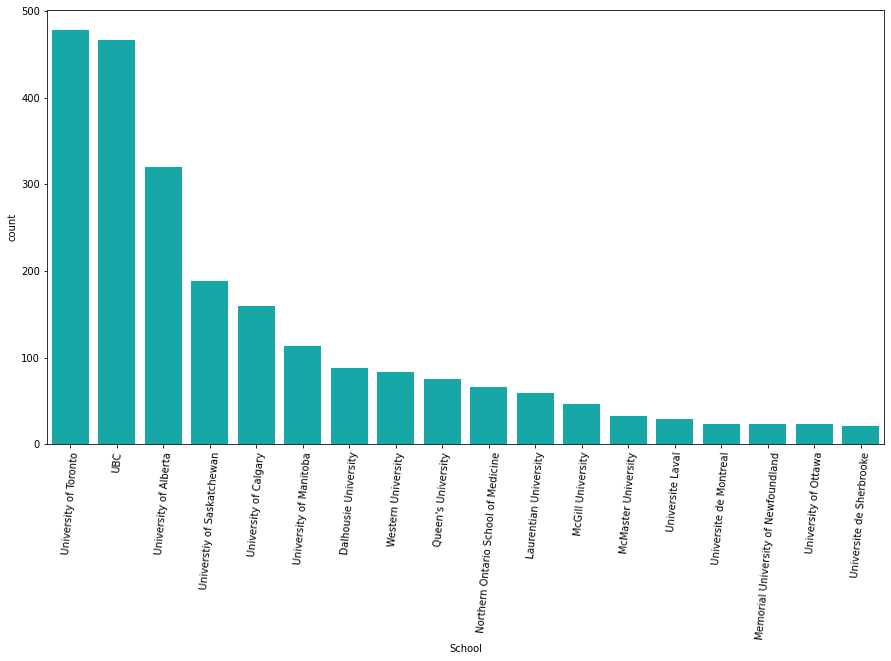

In [28]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'School',
              data = df_val,
              color="c",
              order = df_val['School'].value_counts().index)
plt.xticks(rotation=85)

plt.show()

In [29]:
df_val.School.value_counts()

University of Toronto                  478
UBC                                    467
University of Alberta                  320
Universtiy of Saskatchewan             188
University of Calgary                  160
University of Manitoba                 114
Dalhousie University                    88
Western University                      83
Queen's University                      76
Northern Ontario School of Medicine     66
Laurentian University                   59
McGill University                       47
McMaster University                     33
Universite Laval                        29
Universite de Montreal                  24
Memorial University of Newfoundland     24
University of Ottawa                    23
Universite de Sherbrooke                21
Name: School, dtype: int64

In [30]:
df_val.School.value_counts(normalize=True)

University of Toronto                  0.207826
UBC                                    0.203043
University of Alberta                  0.139130
Universtiy of Saskatchewan             0.081739
University of Calgary                  0.069565
University of Manitoba                 0.049565
Dalhousie University                   0.038261
Western University                     0.036087
Queen's University                     0.033043
Northern Ontario School of Medicine    0.028696
Laurentian University                  0.025652
McGill University                      0.020435
McMaster University                    0.014348
Universite Laval                       0.012609
Universite de Montreal                 0.010435
Memorial University of Newfoundland    0.010435
University of Ottawa                   0.010000
Universite de Sherbrooke               0.009130
Name: School, dtype: float64

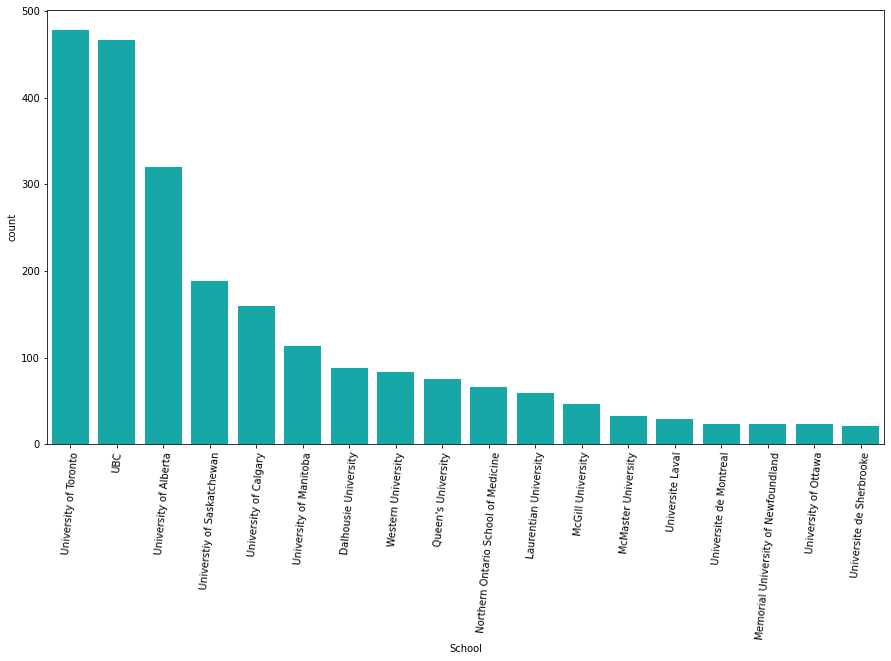

In [31]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'School',
              data = df_val,
              color="c",
              order = df_val['School'].value_counts().index)
plt.xticks(rotation=85)


plt.show()

## Gender

In [32]:
#check number of participants by gender 
df_val.Gender.value_counts()

Female    1408
Male       884
Other        8
Name: Gender, dtype: int64

In [33]:
print("# of female respondents:",len(df_val.loc[df_val['Gender'] == "Female"]))
print("% of female respondents",len(df_val.loc[df_val['Gender'] == "Female"])/(len(df_val))*100)
print("# of male respondents:",len(df_val.loc[df_val['Gender'] == "Male"]))
print("% of male respondents:",len(df_val.loc[df_val['Gender'] == "Male"])/len(df_val)*100)
print("# of non-binary respondents:",len(df_val.loc[df_val['Gender'] == "Other"]))
print("% of non-binary respondents:",len(df_val.loc[df_val['Gender'] == "Other"])/len(df_val)*100)


# of female respondents: 1408
% of female respondents 61.21739130434782
# of male respondents: 884
% of male respondents: 38.43478260869565
# of non-binary respondents: 8
% of non-binary respondents: 0.34782608695652173


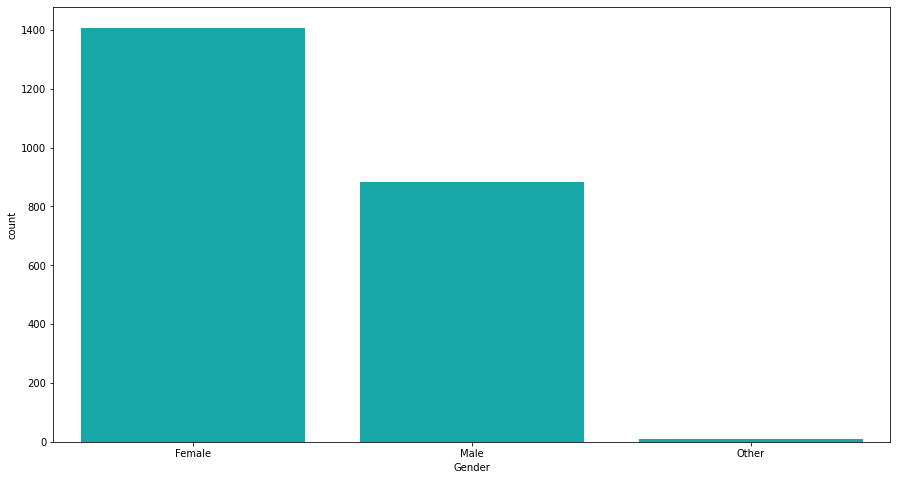

In [34]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'Gender',
              data = df_val,
              color="c",
              order = df_val['Gender'].value_counts().index)
#plt.xticks(rotation=85)

plt.show()

## Program

In [35]:
#check number of participants by program
#manually added new categories in csv
df_val.Program.value_counts()

MD                           716
Nursing                      522
Occupational Therapy         274
Physical Therapy             255
Pharmacy                     194
Speech Language Pathology    158
Dentistry                     78
Social work                   41
Genetics counselling          40
Midwifery                     22
Name: Program, dtype: int64

In [36]:
#get percentages
df_val.Program.value_counts(normalize=True)

MD                           0.311304
Nursing                      0.226957
Occupational Therapy         0.119130
Physical Therapy             0.110870
Pharmacy                     0.084348
Speech Language Pathology    0.068696
Dentistry                    0.033913
Social work                  0.017826
Genetics counselling         0.017391
Midwifery                    0.009565
Name: Program, dtype: float64

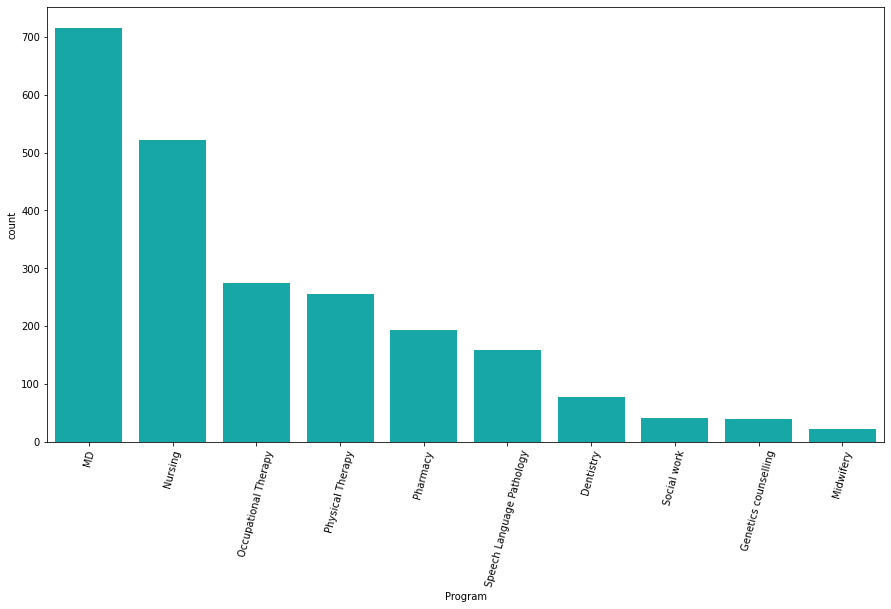

In [37]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'Program',
              data = df_val,
              color="c",
              order = df_val['Program'].value_counts().index)
plt.xticks(rotation=75)

plt.show()

col_0,percentage
Program,
Dentistry,0.033913
Genetics counselling,0.017391
MD,0.311304
Midwifery,0.009565
Nursing,0.226957
Occupational Therapy,0.119130
Pharmacy,0.084348
Physical Therapy,0.110870
Social work,0.017826


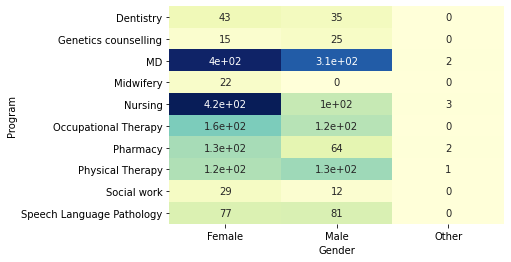

In [38]:
#program representation proportion 
sns.heatmap(pd.crosstab([df_val.Program], [df_val.Gender]),
            cmap="YlGnBu", annot=True, cbar=False)  
program = pd.crosstab(index=df_val["Program"],  
                      columns="percentage",
                      normalize='all')  
program

In [39]:
#AI perception mean across programs
program_totals = df_val.groupby("Program")['AI_percep'].mean()
program_totals

Program
Dentistry                    7.038462
Genetics counselling         6.250000
MD                           7.081006
Midwifery                    4.863636
Nursing                      6.432950
Occupational Therapy         6.332117
Pharmacy                     6.206186
Physical Therapy             6.756863
Social work                  5.195122
Speech Language Pathology    6.436709
Name: AI_percep, dtype: float64

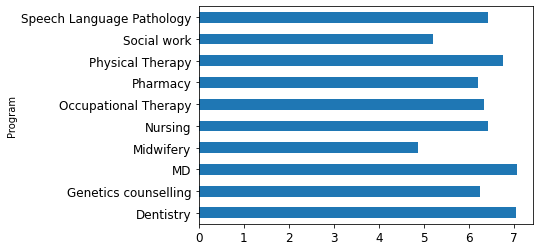

In [40]:
#AI perception mean across programs in bar graph
program_totals.plot(kind="barh", fontsize=12)

In [41]:
#Program participants across Schools
program = pd.crosstab(index=df_val['Program'],  # Make a crosstab
                     columns=[df_val['School']],
                     margins=True)       
#program['percentage'] = program/program.sum()*100
program

School,Dalhousie University,Laurentian University,McGill University,McMaster University,Memorial University of Newfoundland,Northern Ontario School of Medicine,Queen's University,UBC,Universite Laval,Universite de Montreal,Universite de Sherbrooke,University of Alberta,University of Calgary,University of Manitoba,University of Ottawa,University of Toronto,Universtiy of Saskatchewan,Western University,All
Program,,,,,,,,,,,,,,,,,,,
Dentistry,1,0,1,3,1,7,1,13,2,1,1,8,6,8,0,21,4,0,78
Genetics counselling,3,0,2,2,0,0,1,8,0,1,0,4,7,4,0,5,3,0,40
MD,39,0,10,5,4,24,56,240,17,1,2,54,30,6,6,178,8,36,716
Midwifery,0,20,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,22
Nursing,2,39,5,5,1,6,7,35,2,2,3,141,36,14,4,101,119,0,522
Occupational Therapy,5,0,10,5,5,7,3,60,3,4,7,37,16,27,2,42,14,27,274
Pharmacy,26,0,1,5,5,1,1,17,0,1,2,40,3,9,2,72,9,0,194
Physical Therapy,8,0,9,4,3,10,4,70,2,5,1,19,50,17,4,38,11,0,255
Social work,0,0,1,1,0,2,1,14,1,2,0,4,4,0,2,3,5,1,41


## Age
What is the average age of participants?

In [42]:
#mean age
df_val["Age"].describe()

count    2300.000000
mean       25.157391
std         4.775291
min        18.000000
25%        22.000000
50%        24.000000
75%        27.000000
max        62.000000
Name: Age, dtype: float64

In [43]:
#median age
df_val.agg(
    {
        "Age": ["min", "max", "median", "skew"]
    })

,Age
min,18.000000
max,62.000000
median,24.000000
skew,1.832338


In [44]:
#What is the average age for male versus female participants?
df_val[["Gender", "Age"]].groupby("Gender").mean()

,Age
Gender,
Female,24.916903
Male,25.565611
Other,22.375000


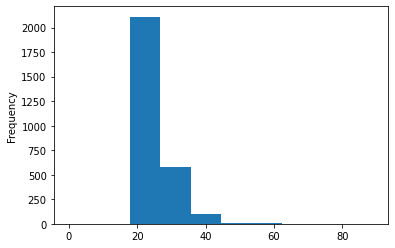

In [45]:
#check age distribution 
age_dist = df["Age"]
age_dist.plot(kind="hist")

## Professional Interest
1=research, 2=business/entrepreneurship, 3=clinical work only 

In [46]:
df_val['Professional_interest'].value_counts()

I would like to do research as part of my career in the future                                                                                                       857
I would like to start my own practice/business in the future                                                                                                         511
I want to focus on clinical work only                                                                                                                                472
I would like to do research as part of my career in the future,I would like to start my own practice/business in the future                                          220
I would like to start my own practice/business in the future,I want to focus on clinical work only                                                                   109
I would like to do research as part of my career in the future,I want to focus on clinical work only                                                       

In [47]:
df_val['Professional_interest'].value_counts(normalize=True)

I would like to do research as part of my career in the future                                                                                                       0.372609
I would like to start my own practice/business in the future                                                                                                         0.222174
I want to focus on clinical work only                                                                                                                                0.205217
I would like to do research as part of my career in the future,I would like to start my own practice/business in the future                                          0.095652
I would like to start my own practice/business in the future,I want to focus on clinical work only                                                                   0.047391
I would like to do research as part of my career in the future,I want to focus on clinical work only                              

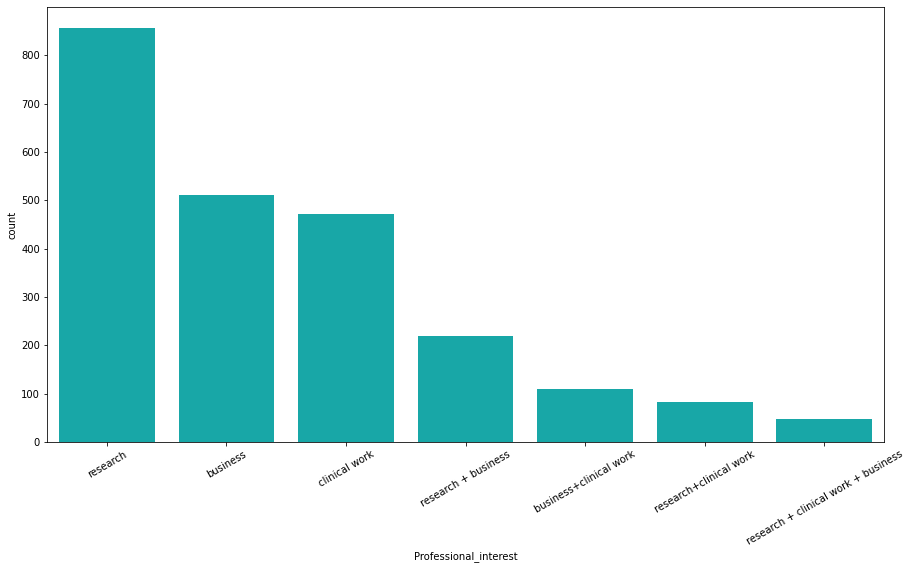

In [48]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'Professional_interest',
              data = df_val,
              color="c",
              order = df_val['Professional_interest'].value_counts().index)
#plt.xticks(rotation=85)
x1 = [0,1,2,3,4,5,6]
labels = ["research","business","clinical work",
          "research + business", "business+clinical work",
          "research+clinical work","research + clinical work + business"]

plt.xticks(x1, labels, rotation=30)

plt.show()

## Education Level
4=high school; 5=Bachelors; 6=Masters; 7=PhD; 8=Other; 9=diploma/certificate

In [49]:
#highest degree completed frequencies 
highest_ed = pd.crosstab(index=df_val['Highest_ed'],  # Make a crosstab
                     columns='count',
                     margins=True)       
highest_ed

col_0,count,All
Highest_ed,,
Bachelor's degree,1232,1232
Diploma/Certificate,29,29
High school,387,387
Master's degree,465,465
PhD degree,187,187
All,2300,2300


In [50]:
#mean AI perceptions grouped by education level
df_val.groupby(["Highest_ed"])["AI_percep"].mean()

Highest_ed
Bachelor's degree      6.734578
Diploma/Certificate    7.758621
High school            6.224806
Master's degree        6.675269
PhD degree             6.368984
Name: AI_percep, dtype: float64

In [51]:
print("# of Bachelor's degree:",len(df_val.loc[df_val['Highest_ed'] == "Bachelor's degree"]))
print("% of Bachelor's degree",len(df_val.loc[df_val['Highest_ed'] == "Bachelor's degree"])/(len(df_val))*100)
print("# of High school:",len(df_val.loc[df_val['Highest_ed'] == "High school"]))
print("% of High school",len(df_val.loc[df_val['Highest_ed'] == "High school"])/(len(df_val))*100)
print("# of Master's degree:",len(df_val.loc[df_val['Highest_ed'] == "Master's degree"]))
print("% of Master's degree",len(df_val.loc[df_val['Highest_ed'] == "Master's degree"])/(len(df_val))*100)
print("# of PhD degree:",len(df_val.loc[df_val['Highest_ed'] == "PhD degree"]))
print("% of PhD degree",len(df_val.loc[df_val['Highest_ed'] == "PhD degree"])/(len(df_val))*100)
print("# of Diploma/Certificate:",len(df_val.loc[df_val['Highest_ed'] == "Diploma/Certificate"]))
print("% of Diploma/Certificate",len(df_val.loc[df_val['Highest_ed'] == "Diploma/Certificate"])/(len(df_val))*100)

# of Bachelor's degree: 1232
% of Bachelor's degree 53.565217391304344
# of High school: 387
% of High school 16.82608695652174
# of Master's degree: 465
% of Master's degree 20.217391304347824
# of PhD degree: 187
% of PhD degree 8.130434782608695
# of Diploma/Certificate: 29
% of Diploma/Certificate 1.2608695652173914


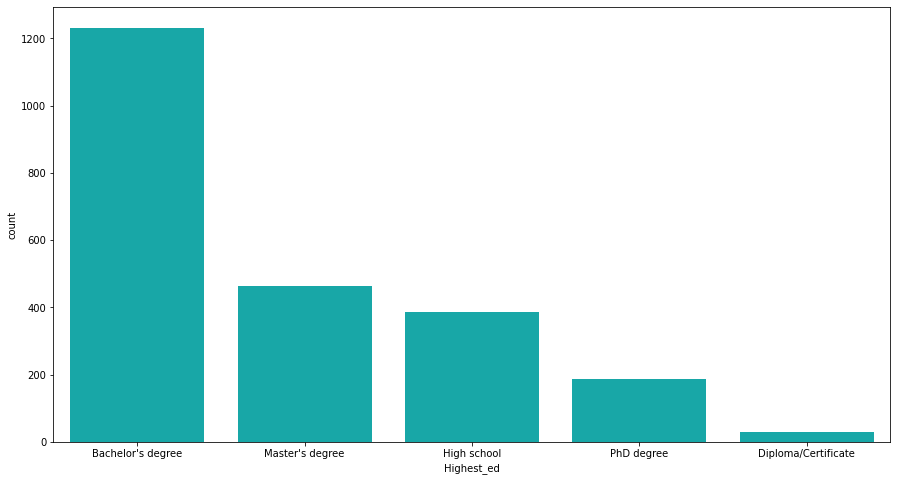

In [52]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'Highest_ed',
              data = df_val,
              color="c",
              order = df_val['Highest_ed'].value_counts().index)
#plt.xticks(rotation=85)

plt.show()

In [53]:
def age_group(age):
    
    """Creates an age bucket for each participant using the age variable.
        Meant to be used on a DataFrame with .apply()."""
    
    # Convert to an int, in case the data is read in as an "object" (aka string)
    age = int(age)
    bucket = ()
    
    if age < 21:
        bucket = '<21'
    
    # Age 30 to 39 ('range' excludes upper bound)
    if age in range(21, 26):
        bucket = '21-25'
        
    if age in range(26, 31):
        bucket = '26-30'
        
    if age in range(31, 36):
        bucket = '31-35'

    if age in range(36, 41):
        bucket = '36-40'
    
    if age in range(41, 46):
        bucket = '41-45'

    if age in range(46, 51):
        bucket = '46-50'
   
    if age > 50:
        bucket = '50+'

    return bucket 

In [54]:
df_val['age_group'] = df_val['Age'].apply(age_group)
df_val['age_group']

0       21-25
1       21-25
2       21-25
3       21-25
4       21-25
        ...  
2939    26-30
2940    21-25
2942    21-25
2943    21-25
2944    21-25
Name: age_group, Length: 2300, dtype: object

In [55]:
# Subset the columns from when Likert scale questions are asked, 
# through to all the available answers. Easiest to use .iloc for this
#likerts = df_val.iloc[:, 15:22]
objs = df_val.iloc[:,24:32]


In [56]:
objs_grouped = objs.groupby(df_val['Program']).agg('count')

objs_grouped

,Identify when technology is appropriate for a given clinical context,Understand and interpret AI-generated results,Be able to communicate how the technology works in a way that others can understand,Identify the ethical implications of using AI in clinical contexts,Understand how the underlying technological processes work,Learn the terminologies in order to communicate and collaborate with engineers/developers,Identify ways AI can improve healthcare quality improvement,Other
Program,,,,,,,,
Dentistry,39,29,44,33,21,38,10,0
Genetics counselling,14,18,21,10,14,11,15,0
MD,466,318,254,369,137,150,323,1
Midwifery,20,6,8,17,0,0,15,0
Nursing,347,144,183,257,104,95,300,2
Occupational Therapy,126,89,127,116,68,96,88,1
Pharmacy,119,73,65,94,47,41,102,1
Physical Therapy,93,126,139,115,78,70,52,0
Social work,22,19,16,23,12,10,19,0


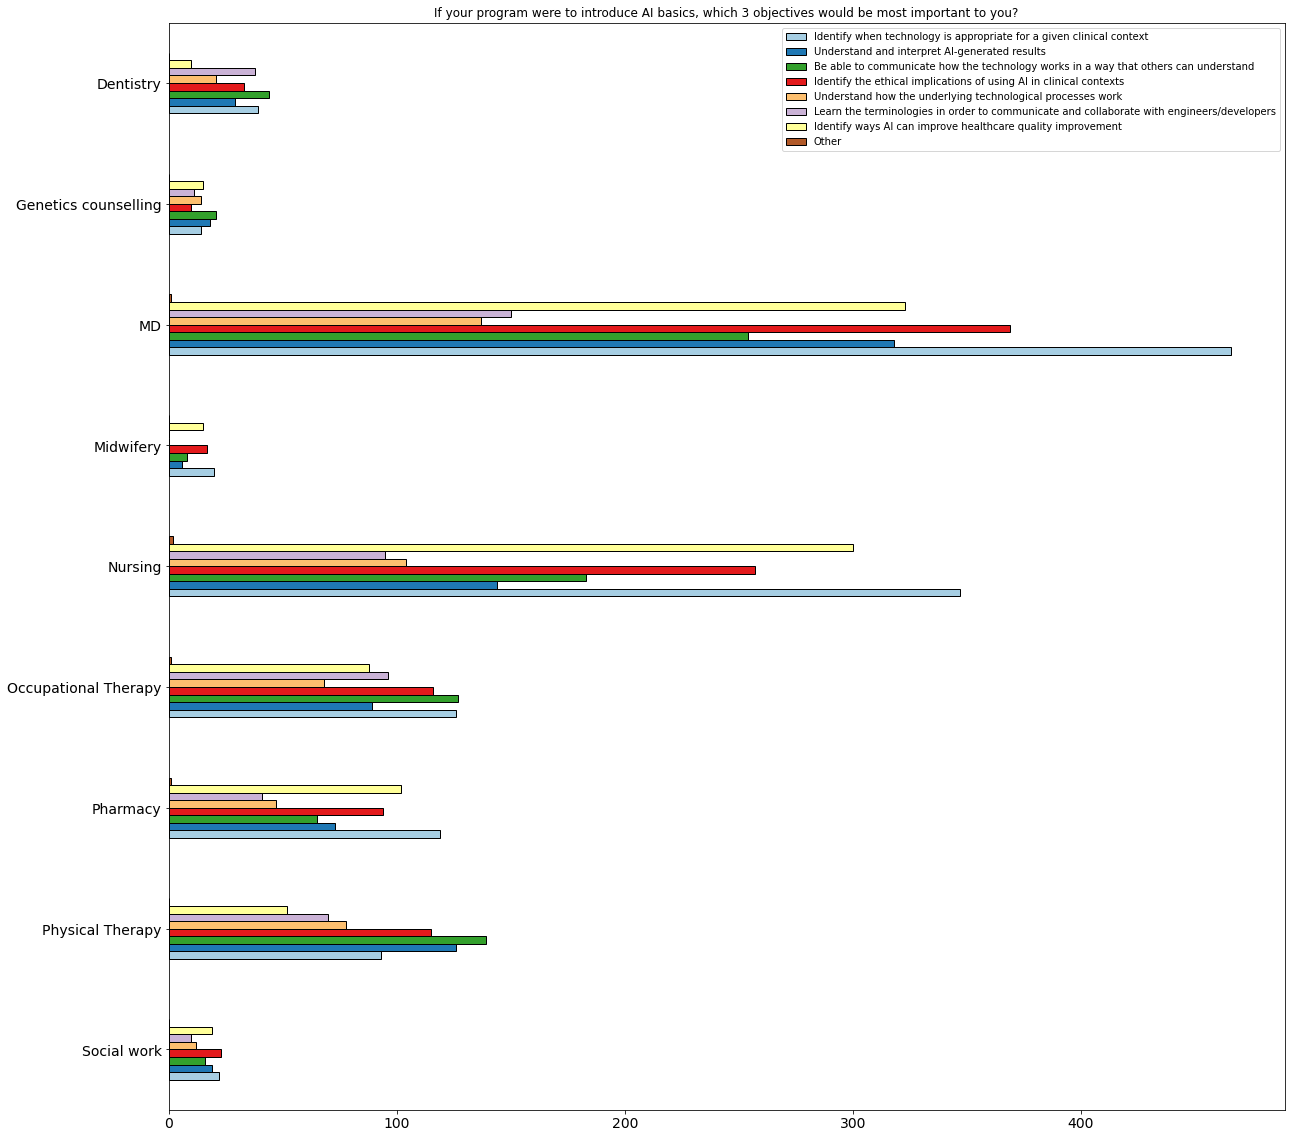

In [57]:
objs_grouped[:-1].sort_index(ascending=False).plot(
    kind='barh',
    figsize=(20, 20),
    cmap='Paired',
    edgecolor='black',
    fontsize=14,
    title='If your program were to introduce AI basics, which 3 objectives would be most important to you?'
    ).yaxis.label.set_visible(False)

In [58]:
df_val['age_group'] = df_val['Age'].apply(age_group)
df_val['age_group']

0       21-25
1       21-25
2       21-25
3       21-25
4       21-25
        ...  
2939    26-30
2940    21-25
2942    21-25
2943    21-25
2944    21-25
Name: age_group, Length: 2300, dtype: object

In [59]:
likerts = df_val2.iloc[:, 15:22]
likerts_grouped = likerts.groupby(df_val2['Program']).agg('median')

likerts_grouped

,How much do you support or oppose the development of AI in your field?,I believe artificial intelligence will have an impact on my career.,I believe healthcare students need to learn the basics of AI.,I understand the ethical implications of AI usage in my field.,I feel hopeful about having AI in my field.
Program,,,,,
Dentistry,7.0,7.0,7.0,7.0,7.0
Genetics counselling,6.0,6.0,6.0,6.0,5.5
MD,7.0,8.0,7.0,5.0,6.0
Midwifery,5.5,6.0,6.5,5.5,3.5
Nursing,7.0,7.0,6.0,6.0,6.0
Occupational Therapy,6.0,6.0,6.0,6.0,6.0
Pharmacy,7.0,7.0,6.0,6.0,6.0
Physical Therapy,7.0,7.0,7.0,7.0,7.0
Social work,6.0,6.0,6.0,6.0,6.0


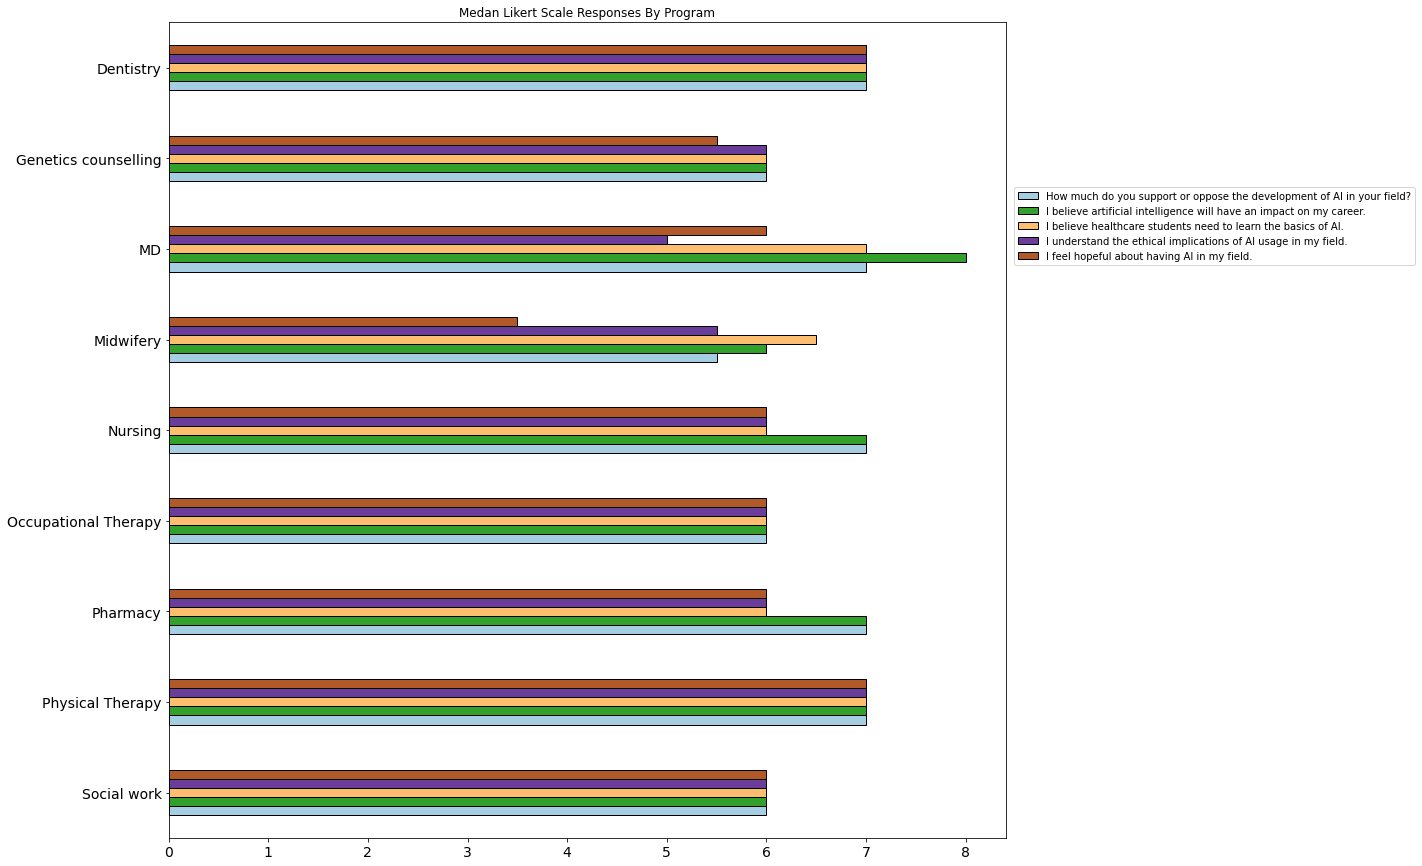

In [60]:
likerts_grouped[:-1].sort_index(ascending=False).plot(
    kind='barh',
    figsize=(15, 15),
    cmap='Paired',
    edgecolor='black',
    fontsize=14,
    title='Medan Likert Scale Responses By Program'
    ).yaxis.label.set_visible(False)
plt.legend(loc='center', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
plt.show()

In [61]:
likerts_groupby_program = likerts.groupby(df_val['Program']).agg('median')

likerts_groupby_program

,How much do you support or oppose the development of AI in your field?,I believe artificial intelligence will have an impact on my career.,I believe healthcare students need to learn the basics of AI.,I understand the ethical implications of AI usage in my field.,I feel hopeful about having AI in my field.
Program,,,,,
Dentistry,7.0,7.0,7.0,7.0,7.0
Genetics counselling,6.0,6.0,6.0,6.0,5.5
MD,7.0,8.0,7.0,5.0,6.0
Midwifery,5.5,6.0,6.5,5.5,3.5
Nursing,7.0,7.0,6.0,6.0,6.0
Occupational Therapy,6.0,6.0,6.0,6.0,6.0
Pharmacy,7.0,7.0,6.0,6.0,6.0
Physical Therapy,7.0,7.0,7.0,7.0,7.0
Social work,6.0,6.0,6.0,6.0,6.0


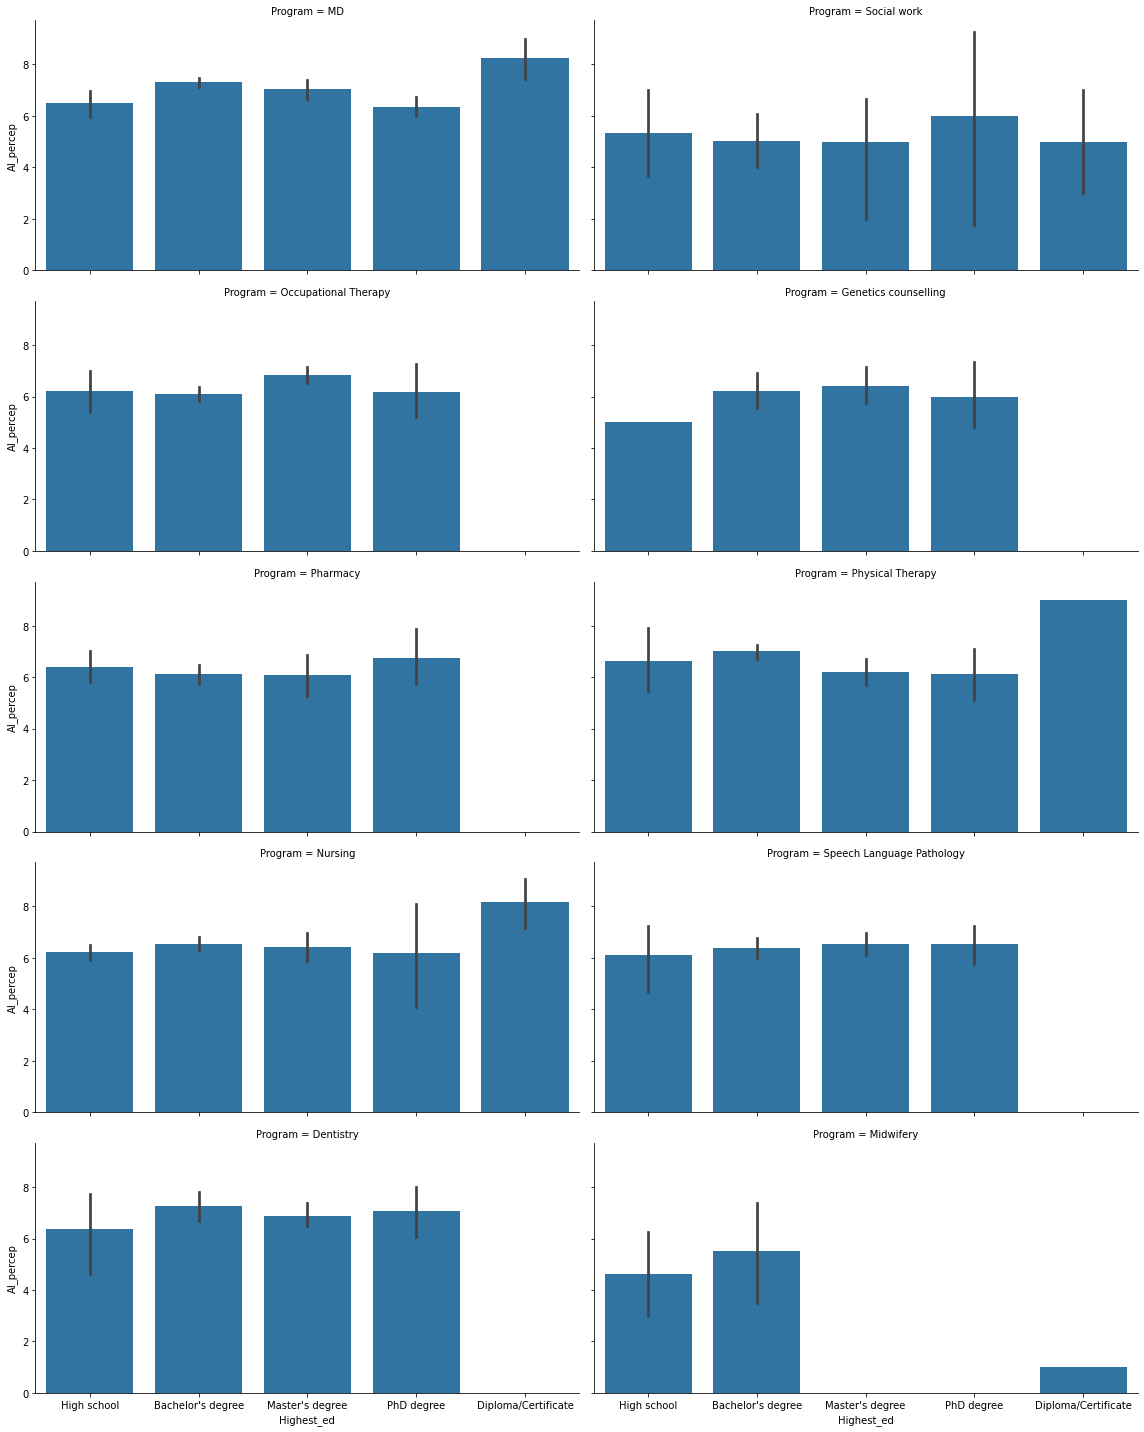

In [62]:
#facetgriding 
g = sns.FacetGrid(df_val, col="Program", height=4, aspect=2, col_wrap=2, legend_out = True)
g.map(sns.barplot, "Highest_ed", "AI_percep", order=["High school","Bachelor's degree","Master's degree", "PhD degree","Diploma/Certificate"])

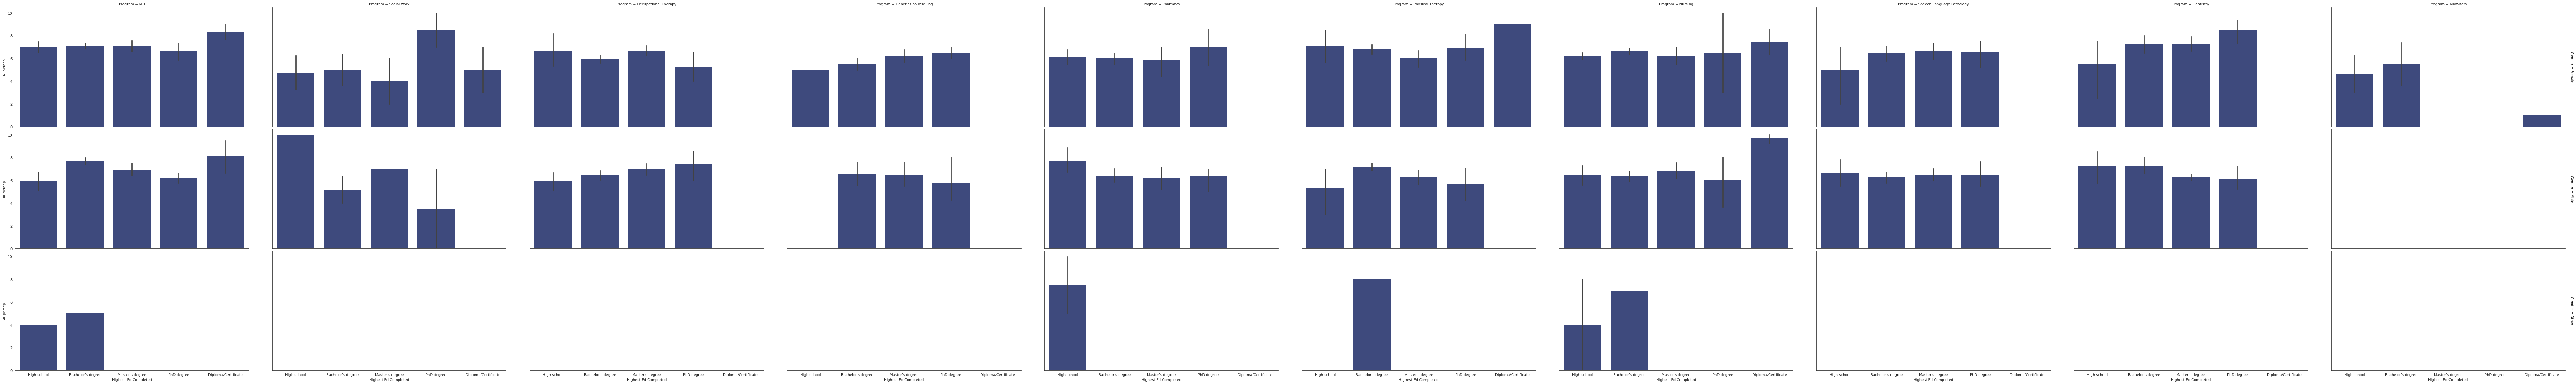

In [63]:
#facetgriding 
with sns.axes_style("white"):
    g = sns.FacetGrid(df_val, row="Gender", col="Program", margin_titles=True, height=5, aspect=2)
g.map(sns.barplot, "Highest_ed", "AI_percep", color="#334488", 
      order=["High school","Bachelor's degree","Master's degree", "PhD degree","Diploma/Certificate"])
g.set_axis_labels("Highest Ed Completed", "AI_percep")
#g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.fig.subplots_adjust(wspace=.1, hspace=.02)

# Perception of AI

## Normality Tests
### Quantile-Quantile Plot
Takes the data sample and by default assume we are comparing it to a Gaussian distribution. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.

In [64]:
#just checking if there are NaN values and if so how many
ai_percep = df_val["AI_percep"]
print(len(ai_percep))
ai_percep_ = [x for x in ai_percep if np.isnan(x) == False]
print(len(ai_percep_)) 

2300
2300


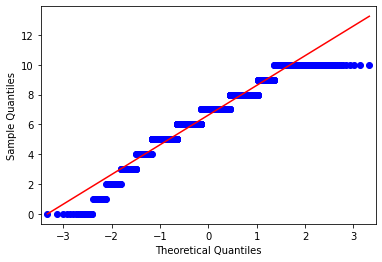

In [65]:
from statsmodels.graphics.gofplots import qqplot
#normality checks
ai_percep = df_val["AI_percep"]
qqplot(ai_percep, line='s')
plt.show()

### Shapiro-Wilk Test
evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution

In [66]:
from scipy.stats import shapiro
stat, p = shapiro(ai_percep)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.953, p=0.000
Sample does not look Gaussian (reject H0)


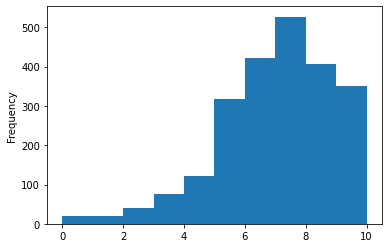

In [67]:
#check histogram
ai_percep = df_val["AI_percep"]
ai_percep.plot(kind="hist")

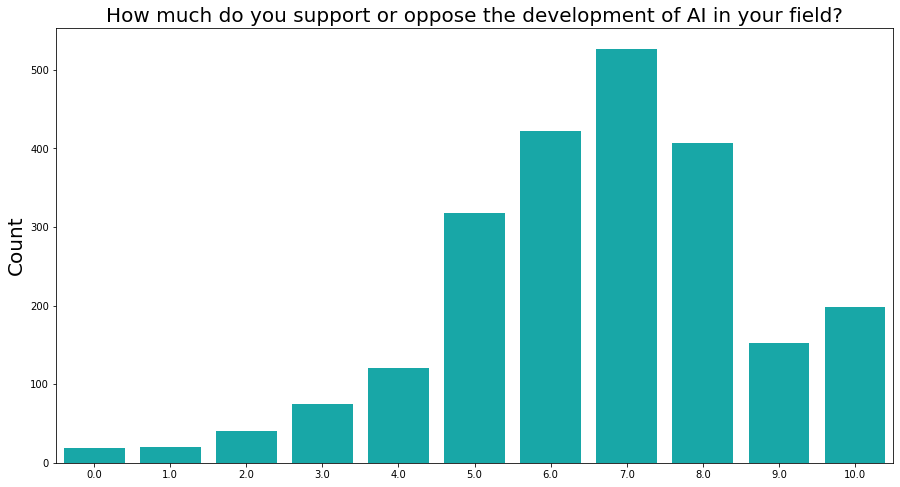

In [68]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_percep',
              data = df_val,
              color="c",)
#plt.xticks(rotation=85)
#x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#labels = ["Multiple Workshop Series","1- or 2-hour workshop",
#         "1-day course","Graduate-level training","Other",
#         "research+clinical work","research + clinical work + business"]

#plt.xticks(x1, labels, rotation=30)
#plt.xticks(rotation=30)
ax.set_title('How much do you support or oppose the development of AI in your field?',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('',fontsize = 20)
plt.show()

### Perception of AI: Differences among healthcare students / age / gender / level of education / school / professional interest


#### sentiment analysis with groups that support and oppose AI development

In [69]:
#group that supports AI development in field 
support_group = df_val.loc[df_val['AI_percep'] >=6]
print(len(support_group))
len(support_group)/len(df_val)

1706


0.7417391304347826

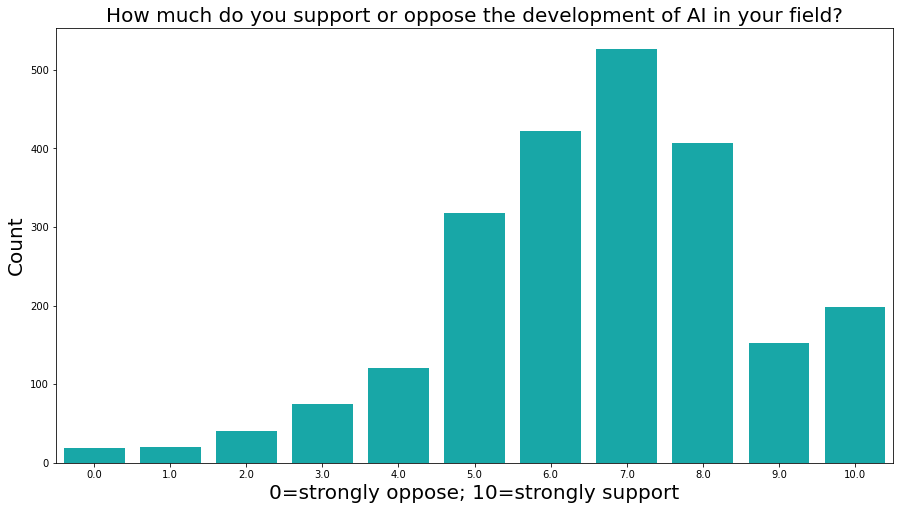

In [70]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_percep',
              data = df_val,
              color="c",)
#plt.xticks(rotation=85)
#x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#labels = ["Multiple Workshop Series","1- or 2-hour workshop",
#         "1-day course","Graduate-level training","Other",
#         "research+clinical work","research + clinical work + business"]

#plt.xticks(x1, labels, rotation=30)
#plt.xticks(rotation=30)
ax.set_title('How much do you support or oppose the development of AI in your field?',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('0=strongly oppose; 10=strongly support',fontsize = 20)
plt.show()

In [71]:
#analysis with only groups that oppose AI development in field 
oppose_group = df_val.loc[df_val['AI_percep'] <=4]
print(len(oppose_group))
len(oppose_group)/len(df_val)

276


0.12

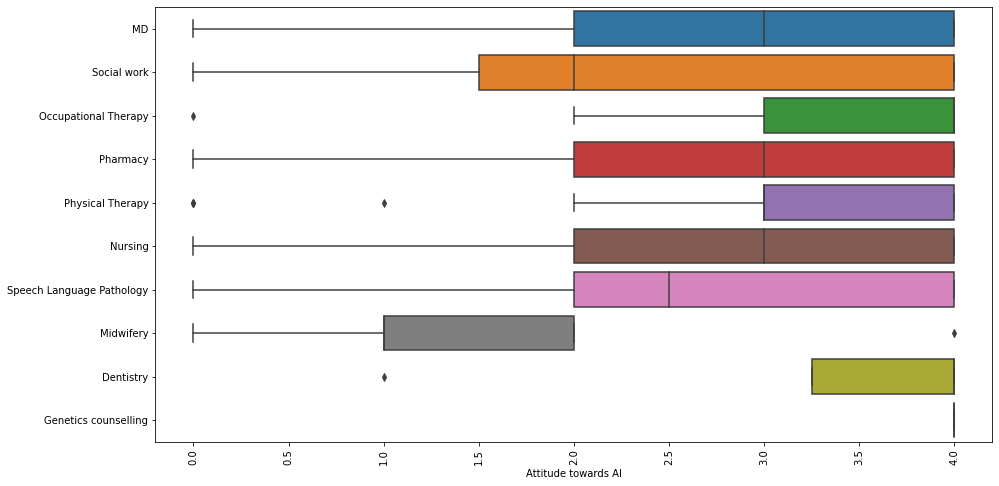

In [72]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_percep',y='Program', data=oppose_group)
school_plot.set_xlabel("Attitude towards AI")
school_plot.set_ylabel("")
plt.xticks(rotation=90)

plt.show()

5.0

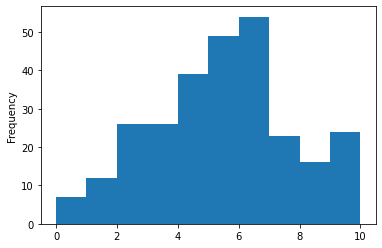

In [73]:
AI_ed_dist_oppose_group = oppose_group["AI_ed_Likert"]
AI_ed_dist_oppose_group.plot(kind="hist")
oppose_group["AI_ed_Likert"].median()

In [74]:
curric_oppose = oppose_group["AI_curric"]
curric_oppose.loc[:].value_counts()


Should be outside of curriculum time       131
Should be part of my program/curriculum    131
Other                                        6
As applicable                                5
Not applicable                               2
In the future                                1
Name: AI_curric, dtype: int64

In [75]:
print(len(oppose_group.loc[oppose_group['AI_curric'] == "Should be outside of curriculum time"])/len(oppose_group))
print(len(oppose_group.loc[oppose_group['AI_curric'] == "Should be part of my program/curriculum"])/len(oppose_group))
print(len(oppose_group.loc[oppose_group['AI_curric'] == "Other"])/len(oppose_group))


0.4746376811594203
0.4746376811594203
0.021739130434782608


#### Are there differences in AI perceptions among the students of different programs?

In [76]:
program = pd.crosstab(index=df_val['Program'],  # Make a crosstab
                     columns=[df_val['AI_percep']],
                     margins=True) 
program

AI_percep,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
Program,,,,,,,,,,,,
Dentistry,0,1,0,0,3,4,27,13,15,7,8,78
Genetics counselling,0,0,0,0,4,8,13,11,0,1,3,40
MD,5,1,10,12,22,111,86,148,167,58,96,716
Midwifery,1,4,3,0,1,2,3,3,3,0,2,22
Nursing,2,9,9,20,29,98,87,118,74,35,41,522
Occupational Therapy,1,0,1,17,22,33,74,64,34,15,13,274
Pharmacy,3,2,5,12,13,27,32,58,19,11,12,194
Physical Therapy,3,1,3,10,16,16,45,59,72,17,13,255
Social work,3,1,4,2,5,4,7,10,2,0,3,41


In [77]:
#difference between programs and AI perceptions 
scipy.stats.kruskal(*[group["AI_percep"].values for name, group in df_val.groupby("Program")])


KruskalResult(statistic=95.32664353172677, pvalue=1.3818550438786238e-16)

In [78]:
prog_diff = sp.posthoc_conover(df_val, val_col='AI_percep', group_col='Program')
prog_diff.to_csv("prog_diff_table.csv")

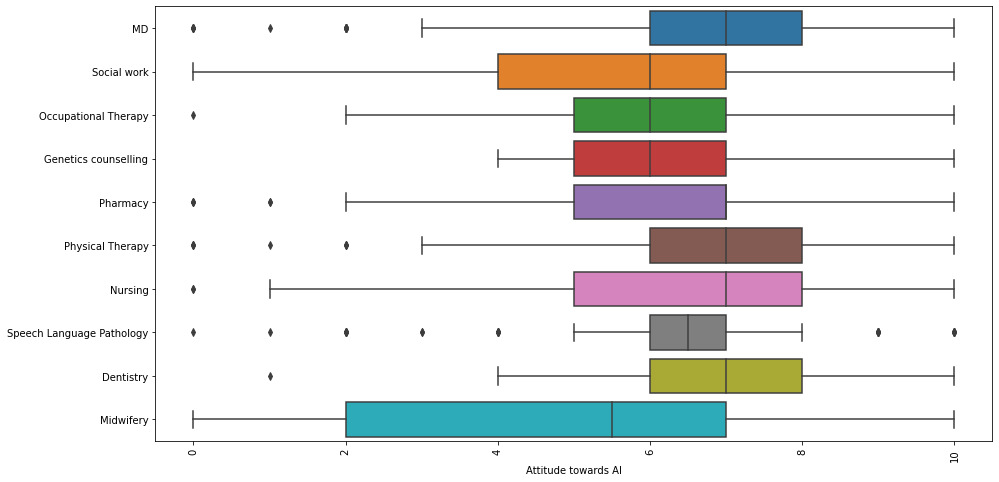

In [79]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_percep',y='Program', data=df_val)
school_plot.set_xlabel("Attitude towards AI")
school_plot.set_ylabel("")
plt.xticks(rotation=90)

plt.show()

The results tell us that there is a significant difference between groups means (p = 1.01e-13). To obtain pairwise group differences, I did a posteriori (post hoc) analysis using scikits-posthocs package, specifically Conover’s test.

#### Are there differences in AI perceptions among the different age groups?

In [80]:
#group age then do kruskal-wallis
bins = [10, 20, 25, 30, 35, 40, 45, 50, 70]
labs=['<21','21-25','26-30','31-35','36-40','41-45','46-50','>50']
age_grouped = pd.cut(df_val.Age, bins=bins, labels=labs)
age_grouped.value_counts()
len(age_grouped)
age_grouped

0       21-25
1       21-25
2       21-25
3       21-25
4       21-25
        ...  
2939    26-30
2940    21-25
2942    21-25
2943    21-25
2944    21-25
Name: Age, Length: 2300, dtype: category
Categories (8, object): ['<21' < '21-25' < '26-30' < '31-35' < '36-40' < '41-45' < '46-50' < '>50']

In [81]:
age_grouped.loc[:].value_counts()

21-25    1286
26-30     520
<21       252
31-35     143
36-40      70
41-45      20
>50         5
46-50       4
Name: Age, dtype: int64

In [82]:
df_val['age_group'] = age_grouped

In [83]:
age_group = pd.crosstab(index=df_val['age_group'],  # Make a crosstab
                     columns='count',
                     margins=False) 
len(age_group)
age_group

col_0,count
age_group,
<21,252
21-25,1286
26-30,520
31-35,143
36-40,70
41-45,20
46-50,4
>50,5


In [84]:
#get percentages
age_grouped.value_counts(normalize=True)

21-25    0.559130
26-30    0.226087
<21      0.109565
31-35    0.062174
36-40    0.030435
41-45    0.008696
>50      0.002174
46-50    0.001739
Name: Age, dtype: float64

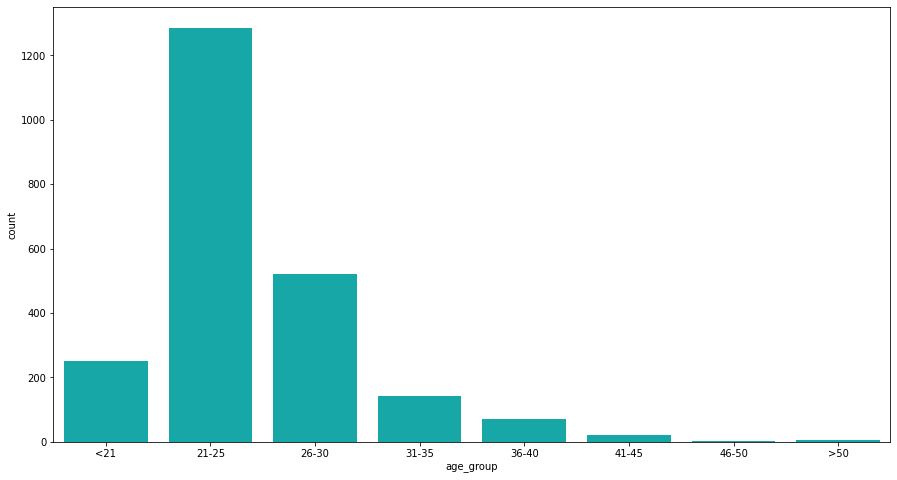

In [85]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'age_group',
              data = df_val,
              color="c")
#plt.xticks(rotation=85)

plt.show()

In [86]:
#difference between age and AI perceptions 
data = [age_grouped.loc[:].values for ids in df_val.groupby('AI_percep')]

scipy.stats.kruskal(*[group["AI_percep"].values for name, group in df_val.groupby("age_group")])


KruskalResult(statistic=14.030148202895033, pvalue=0.05064772917084598)

Text(0.5, 0, 'Age Groups')

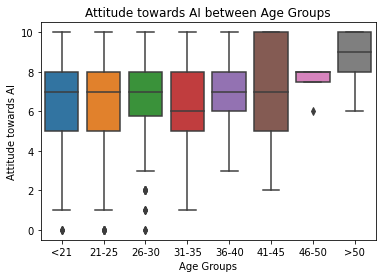

In [87]:
age_plot = sns.boxplot(x='age_group',y='AI_percep', data=df_val)
age_plot.set_ylabel("Attitude towards AI")
age_plot.set_title("Attitude towards AI between Age Groups")
age_plot.set_xlabel("Age Groups")

#### Are there differences in AI perceptions among the different gender?

In [88]:
sp.posthoc_conover(df_val, val_col='AI_percep', group_col='Gender')

,Female,Male,Other
Female,1.000000,0.066699,0.599050
Male,0.066699,1.000000,0.455363
Other,0.599050,0.455363,1.000000


Text(0.5, 0, 'Gender')

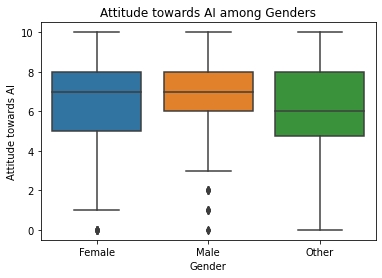

In [89]:
gend_plot = sns.boxplot(x='Gender',y='AI_percep', data=df_val)
gend_plot.set_ylabel("Attitude towards AI")
gend_plot.set_title("Attitude towards AI among Genders")
gend_plot.set_xlabel("Gender")

#### Are there differences in AI perceptions among the different school?

In [90]:
scipy.stats.kruskal(*[group["AI_percep"].values for name,group in df_val.groupby("School")])


KruskalResult(statistic=46.761842236824585, pvalue=0.00013246718809596756)

In [91]:
school_diff = sp.posthoc_conover(df_val, val_col='AI_percep', group_col='School')
school_diff.to_csv("school_diff_table.csv")

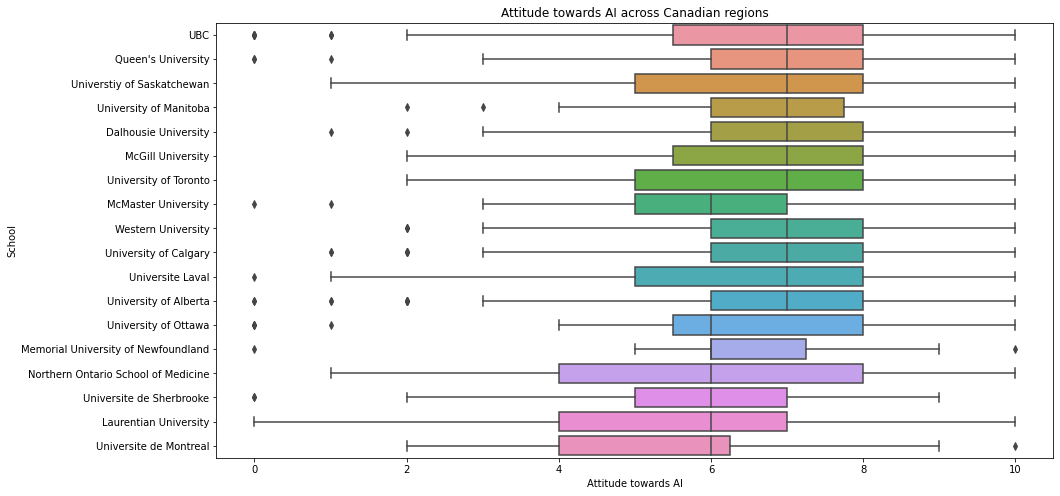

In [92]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_percep',y='School', data=df_val)
school_plot.set_ylabel("School")
school_plot.set_title("Attitude towards AI across Canadian regions")
school_plot.set_xlabel("Attitude towards AI")
#plt.xticks(rotation=90)

plt.show()

In [93]:
#Western Canada
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("UBC", "BC"))

#Prairies 
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("University of Alberta", "Prairies"))
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("University of Calgary", "Prairies"))
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("Universtiy of Saskatchewan", "Prairies"))
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("University of Manitoba", "Prairies"))

#Ontario
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("University of Toronto", "Ontario"))
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("University of Ottawa", "Ontario"))
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("McMaster University", "Ontario"))
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("Western University", "Ontario"))
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("Northern Ontario School of Medicine", "Ontario"))
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("Laurentian University", "Ontario"))
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("Queen's University", "Ontario"))

#Atlantic Canada
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("Memorial University of Newfoundland", "Atlantic Canada"))
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("Dalhousie University", "Atlantic Canada"))

#Quebec
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("Universite Laval", "Quebec"))
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("Universite de Montreal", "Quebec"))
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("McGill University", "Quebec"))
df_val["Region"] = df_val["School"].apply(lambda x: x.replace("Universite de Sherbrooke", "Atlantic Canada"))


In [94]:
scipy.stats.kruskal(*[group["AI_percep"].values for name,group in df_val.groupby("School")])


KruskalResult(statistic=46.761842236824585, pvalue=0.00013246718809596756)

In [95]:
region_diff = sp.posthoc_conover(df_val, val_col='AI_percep', group_col='School')
region_diff

,Dalhousie University,Laurentian University,McGill University,McMaster University,Memorial University of Newfoundland,Northern Ontario School of Medicine,Queen's University,UBC,Universite Laval,Universite de Montreal,Universite de Sherbrooke,University of Alberta,University of Calgary,University of Manitoba,University of Ottawa,University of Toronto,Universtiy of Saskatchewan,Western University
Dalhousie University,1.000000,0.004347,0.606612,0.017129,0.387230,0.022226,0.116651,0.916782,0.684267,0.003147,0.041392,0.766283,0.896340,0.629682,0.512165,0.214940,0.302648,0.698745
Laurentian University,0.004347,1.000000,0.047720,0.975651,0.245596,0.547575,0.000030,0.000714,0.083045,0.407888,0.952049,0.001725,0.002392,0.010281,0.183820,0.014836,0.020079,0.013471
McGill University,0.606612,0.047720,1.000000,0.082958,0.672371,0.143174,0.067993,0.597109,0.979869,0.019239,0.125228,0.713992,0.648034,0.887111,0.812147,0.739444,0.805669,0.853054
McMaster University,0.017129,0.975651,0.082958,1.000000,0.283441,0.591601,0.000448,0.008442,0.116298,0.470183,0.975292,0.013668,0.014098,0.034338,0.219723,0.056753,0.060976,0.037772
Memorial University of Newfoundland,0.387230,0.245596,0.672371,0.283441,1.000000,0.466972,0.057525,0.371694,0.684689,0.095395,0.321219,0.440240,0.406177,0.560582,0.875754,0.791663,0.760837,0.546069
Northern Ontario School of Medicine,0.022226,0.547575,0.143174,0.591601,0.466972,1.000000,0.000243,0.006176,0.200167,0.196188,0.623380,0.012801,0.015236,0.049377,0.365747,0.081733,0.094409,0.057564
Queen's University,0.116651,0.000030,0.067993,0.000448,0.057525,0.000243,1.000000,0.037153,0.127386,0.000078,0.002664,0.027443,0.059097,0.033959,0.093505,0.001623,0.005350,0.054837
UBC,0.916782,0.000714,0.597109,0.008442,0.371694,0.006176,0.037153,1.000000,0.695408,0.001420,0.030310,0.744652,0.955180,0.590083,0.508082,0.042999,0.161307,0.692706
Universite Laval,0.684267,0.083045,0.979869,0.116298,0.684689,0.200167,0.127386,0.695408,1.000000,0.031554,0.154064,0.791398,0.729532,0.928548,0.811932,0.766462,0.817338,0.897256
Universite de Montreal,0.003147,0.407888,0.019239,0.470183,0.095395,0.196188,0.000078,0.001420,0.031554,1.000000,0.535614,0.002334,0.002466,0.006451,0.070922,0.010339,0.011598,0.007378


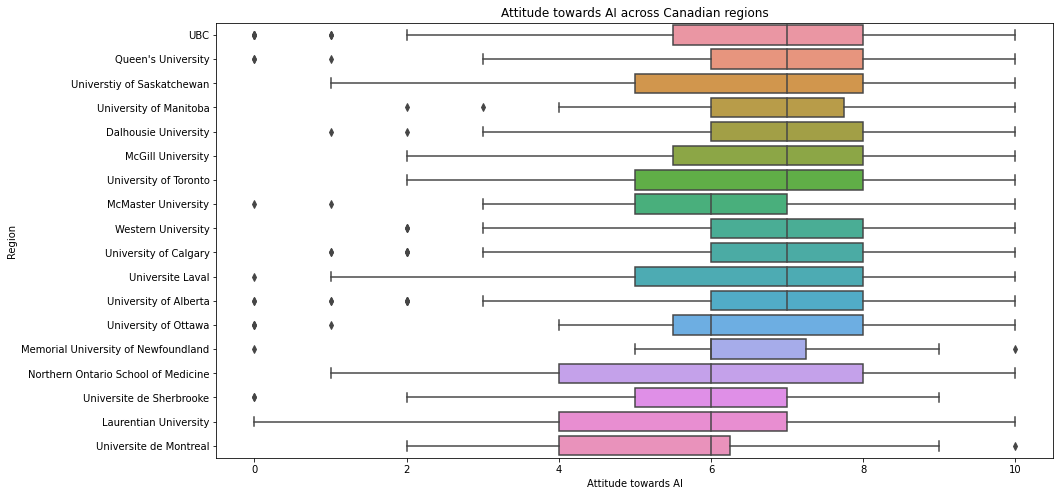

In [96]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_percep',y='School', data=df_val)
school_plot.set_ylabel("Region")
school_plot.set_title("Attitude towards AI across Canadian regions")
school_plot.set_xlabel("Attitude towards AI")
#plt.xticks(rotation=90)

plt.show()

#### Are there differences in AI perceptions among year levels?

In [97]:
scipy.stats.kruskal(*[group["AI_percep"].values for name,group in df_val.groupby("Year_level",dropna=True)])


KruskalResult(statistic=21.35906318889816, pvalue=0.00026875947560787744)

In [98]:
year_level_df = df_val[df_val['Year_level'].notna()]
sp.posthoc_conover(year_level_df, val_col='AI_percep', group_col='Year_level')


,1st year,2nd year,3rd year,4th year,Other
1st year,1.000000,0.000090,0.000124,0.018995,0.022682
2nd year,0.000090,1.000000,0.904531,0.330151,0.260351
3rd year,0.000124,0.904531,1.000000,0.300619,0.277480
4th year,0.018995,0.330151,0.300619,1.000000,0.153948
Other,0.022682,0.260351,0.277480,0.153948,1.000000


Text(0.5, 0, 'Year Level')

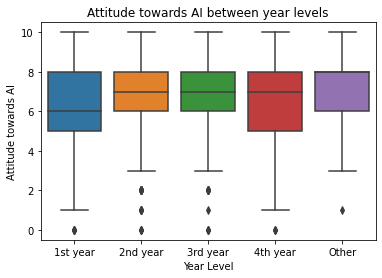

In [99]:
yearlevel_plot = sns.boxplot(x='Year_level',y='AI_percep', data=df_val)
yearlevel_plot.set_ylabel("Attitude towards AI")
yearlevel_plot.set_title("Attitude towards AI between year levels")
yearlevel_plot.set_xlabel("Year Level")

#### Are there differences in AI perceptions among the different level of education?

In [100]:
scipy.stats.kruskal(*[group["AI_percep"].values for name,group in df_val.groupby("Highest_ed")])


KruskalResult(statistic=34.119412181593326, pvalue=7.043271993322782e-07)

In [101]:
year_level_df = df_val[df_val['Highest_ed'].notna()]
sp.posthoc_conover(year_level_df, val_col='AI_percep', group_col='Highest_ed')

,Bachelor's degree,Diploma/Certificate,High school,Master's degree,PhD degree
Bachelor's degree,1.000000,0.003267,0.000028,0.276420,0.002151
Diploma/Certificate,0.003267,1.000000,0.000035,0.001394,0.000071
High school,0.000028,0.000035,1.000000,0.007141,0.969285
Master's degree,0.276420,0.001394,0.007141,1.000000,0.035837
PhD degree,0.002151,0.000071,0.969285,0.035837,1.000000


In [102]:
df_val.Highest_ed.value_counts()

Bachelor's degree      1232
Master's degree         465
High school             387
PhD degree              187
Diploma/Certificate      29
Name: Highest_ed, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

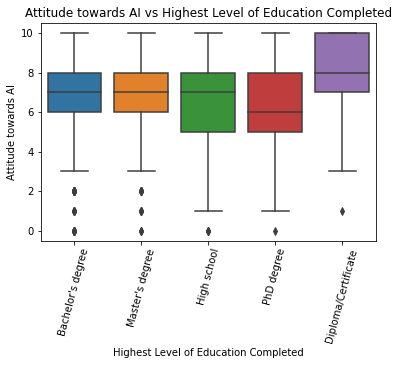

In [103]:
Highest_ed_plot = sns.boxplot(x='Highest_ed',y='AI_percep', data=df_val)
Highest_ed_plot.set_ylabel("Attitude towards AI")
Highest_ed_plot.set_title("Attitude towards AI vs Highest Level of Education Completed")
Highest_ed_plot.set_xlabel("Highest Level of Education Completed")
plt.xticks(rotation=75)


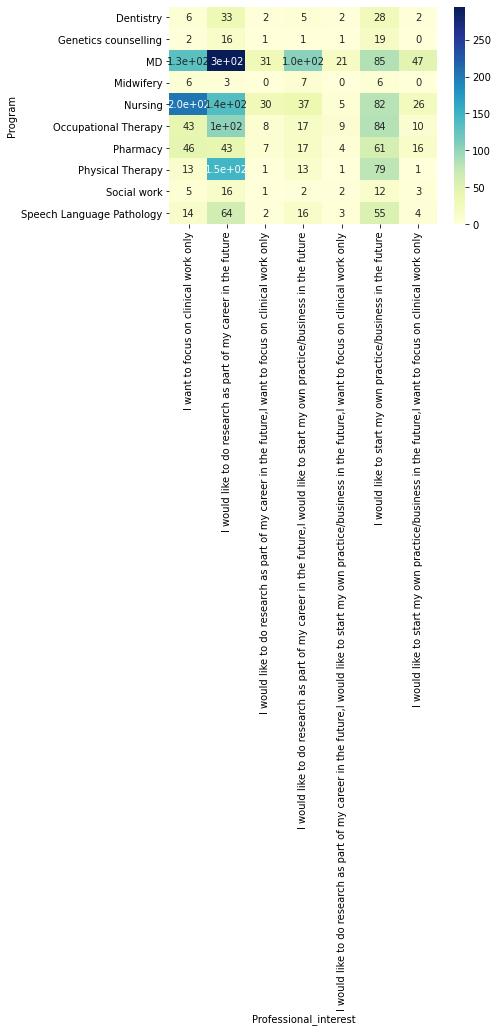

In [104]:
sns.heatmap(pd.crosstab([df_val.Program], [df_val.Professional_interest]),
            cmap="YlGnBu", annot=True, cbar=True)  

#### Are there differences in AI perceptions among the different professional interests?

In [105]:
scipy.stats.kruskal(*[group["AI_percep"].values for name,group in df_val.groupby("Professional_interest")])

KruskalResult(statistic=42.66943434911625, pvalue=1.3559719796428644e-07)

In [106]:
profin_df = df_val[df_val['Professional_interest'].notna()]
toxsxl = sp.posthoc_conover(profin_df, val_col='AI_percep', group_col='Professional_interest')
toxsxl.to_csv('profin_table.csv')  

Text(0.5, 1.0, 'Attitude towards AI vs Professional Interests')

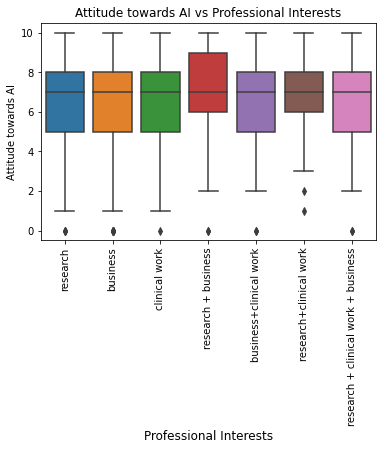

In [107]:
proin_plot = sns.boxplot(x='Professional_interest',
                         y='AI_percep', data=df_val,
                         order = df_val['Professional_interest'].value_counts().index)
proin_plot.set_xlabel("Professional Interests",fontsize=12)
proin_plot.set_ylabel("Attitude towards AI")
x1 = [0,1,2,3,4,5,6]
labels = ["research","business","clinical work",
          "research + business", "business+clinical work",
          "research+clinical work","research + clinical work + business"]

plt.xticks(x1, labels, rotation=90)

proin_plot.set_title("Attitude towards AI vs Professional Interests")


# Sentiment: Diverging stacked bar charts

In [108]:
#if AI_percep <4 is negative, =5 is neutral, >6 is positive 
def f(df):
    if df['AI_percep'] <= 4:
        val = 'negative'
    elif df['AI_percep'] >= 6:
        val = 'positive'
    else:
        val = "neutral"
    return val

df_val['sentiment'] = df_val.apply(f, axis=1)

In [109]:
#add index
df_val["index"] = df_val.index
#create dataframe with data needed for diversing bar charts
df2 = df_val[["index","AI_percep","sentiment","Program"]]


In [110]:
categories = [
    'negative',
    'neutral',
    'positive'
]

# rearrange the data into the format we desire to only show airline and its sentiment proportions
prog_AI_percep = pd.pivot_table(
    df2,
    index = 'Program',
    columns = 'sentiment',
    values = 'index',
    aggfunc = 'count'
)

# reorder the columns as desired above
#prog_AI_percep = prog_AI_percep[category_order]
# make specific columns to represent undesired or negative answers
prog_AI_percep = prog_AI_percep[categories]
prog_AI_percep.negative = prog_AI_percep.negative * -1
prog_AI_percep.value_counts()

negative  neutral  positive
-4        8        28          1
          4        70          1
-9        2        11          1
-15       4        22          1
-16       15       127         1
-33       16       206         1
-35       27       132         1
-41       33       200         1
-50       111      555         1
-69       98       355         1
dtype: int64

In [111]:
# sort by desired column
prog_AI_percep = prog_AI_percep.sort_values(by=['positive','negative'], ascending = False)

fig = go.Figure()

for column in prog_AI_percep.columns:
    fig.add_trace(go.Bar(
        x = prog_AI_percep[column],
        y = prog_AI_percep.index,
        name = column,
        orientation = 'h',
        marker_color = cl.scales[str(len(categories))]['div']['RdYlGn'][categories.index(column)],
    ))

fig.update_layout(
    barmode = 'relative',
    title = 'Sentiment Analysis of AI perpcetion among programs'
)
fig.show()

# Healthcare Student Beliefs & Attitudes Towards AI on their Careers
Likert scale responses where 0=completely disagree, 5=neutral, 10=completely agree

In [112]:
#group that believes AI will impact their careers 
grp = df_val.loc[df_val['AI_impact_Likert'] >=6]
print(len(grp))
len(grp)/len(df_val)

1811


0.7873913043478261

In [113]:
scipy.stats.kruskal(*[group["AI_impact_Likert"].values for name,group in df_val.groupby("Program")])


KruskalResult(statistic=130.59204366995652, pvalue=8.959805280270915e-24)

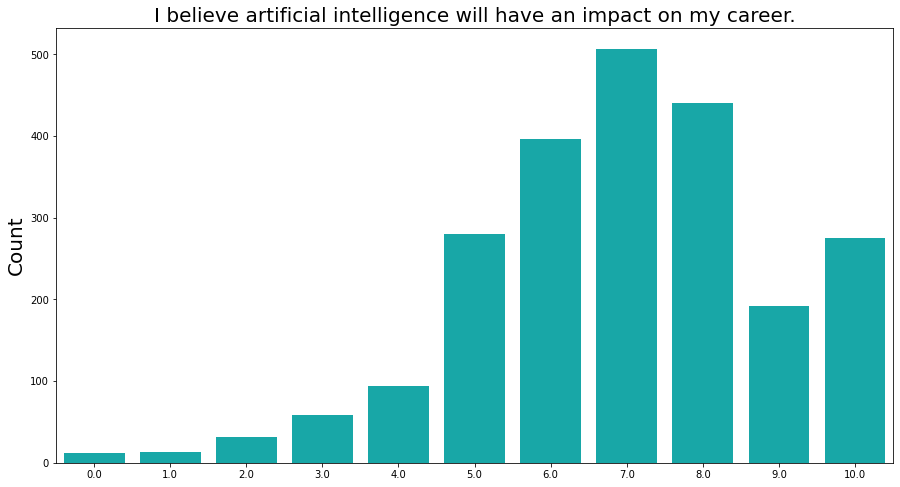

In [114]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_impact_Likert',
              data = df_val,
              color="c",)
#plt.xticks(rotation=85)
#x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#labels = ["Multiple Workshop Series","1- or 2-hour workshop",
#         "1-day course","Graduate-level training","Other",
#         "research+clinical work","research + clinical work + business"]

#plt.xticks(x1, labels, rotation=30)
#plt.xticks(rotation=30)
ax.set_title('I believe artificial intelligence will have an impact on my career.',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('',fontsize = 20)
plt.show()

In [115]:
prog_diff_AI_impact_Likert = sp.posthoc_conover(df_val, val_col='AI_impact_Likert', group_col='Program')
prog_diff_AI_impact_Likert.to_csv("prog_diff_AI_impact_Likert.csv")

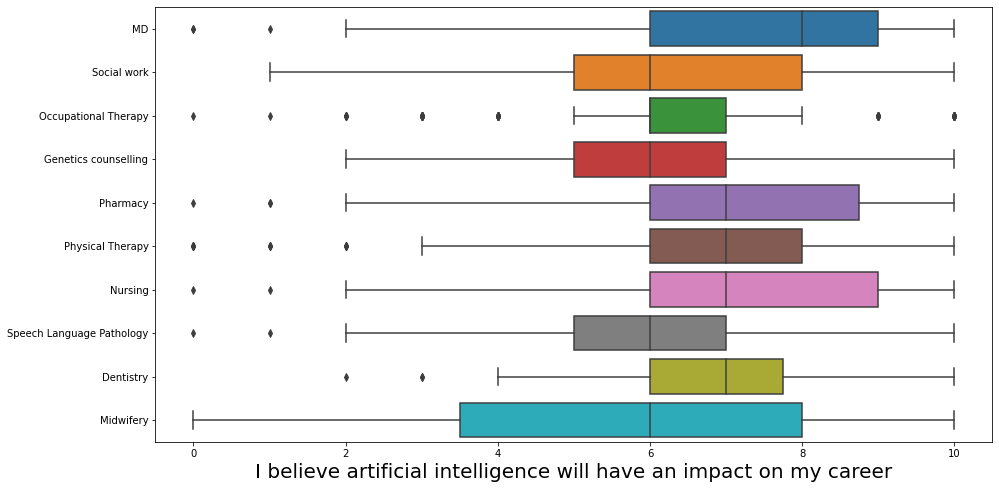

In [116]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_impact_Likert',y='Program', data=df_val)
school_plot.set_xlabel("I believe artificial intelligence will have an impact on my career",fontsize = 20)
school_plot.set_ylabel("")
plt.show()

In [117]:
impact_diff = sp.posthoc_conover(df_val, val_col='AI_impact_Likert', group_col='Program')
impact_diff

,Dentistry,Genetics counselling,MD,Midwifery,Nursing,Occupational Therapy,Pharmacy,Physical Therapy,Social work,Speech Language Pathology
Dentistry,1.000000,0.166792,2.830671e-05,0.940384,4.455019e-03,5.259994e-01,4.950965e-03,0.151474,0.519553,1.608694e-01
Genetics counselling,0.166792,1.000000,2.332864e-06,0.344617,1.842056e-04,2.679076e-01,2.034743e-04,0.007566,0.515019,6.723494e-01
MD,0.000028,0.000002,1.000000e+00,0.016728,7.268144e-03,4.382839e-16,1.284952e-01,0.000017,0.000104,4.319189e-15
Midwifery,0.940384,0.344617,1.672797e-02,1.000000,9.490146e-02,7.750368e-01,7.910642e-02,0.359368,0.687842,4.392487e-01
Nursing,0.004455,0.000184,7.268144e-03,0.094901,1.000000e+00,1.180331e-08,7.075365e-01,0.036433,0.003805,3.215945e-09
Occupational Therapy,0.525999,0.267908,4.382839e-16,0.775037,1.180331e-08,1.000000e+00,1.096150e-06,0.002173,0.798006,2.593438e-01
Pharmacy,0.004951,0.000203,1.284952e-01,0.079106,7.075365e-01,1.096150e-06,1.000000e+00,0.044559,0.003569,1.075300e-07
Physical Therapy,0.151474,0.007566,1.675822e-05,0.359368,3.643347e-02,2.172511e-03,4.455902e-02,1.000000,0.065630,1.806652e-04
Social work,0.519553,0.515019,1.036308e-04,0.687842,3.805404e-03,7.980065e-01,3.568782e-03,0.065630,1.000000,6.903109e-01
Speech Language Pathology,0.160869,0.672349,4.319189e-15,0.439249,3.215945e-09,2.593438e-01,1.075300e-07,0.000181,0.690311,1.000000e+00


2300

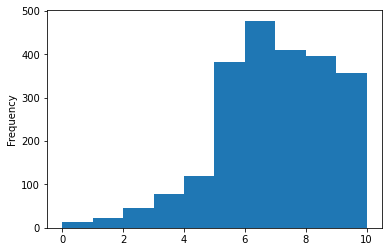

In [118]:
#Likert Scale Responses to Statement:"I believe healthcare students need to learn the basics of AI."
AI_ed_dist = df_val["AI_ed_Likert"]
AI_ed_dist.plot(kind="hist")
len(df_val["AI_ed_Likert"])

In [119]:
scipy.stats.kruskal(*[group["AI_ed_Likert"].values for name,group in df_val.groupby("Program")])


KruskalResult(statistic=29.424238823992344, pvalue=0.000549429566570591)

In [120]:
AI_ed_Likert_diff = sp.posthoc_conover(df_val, val_col='AI_ed_Likert', group_col='Program')
AI_ed_Likert_diff.to_csv("AI_ed_Likert_diff.csv")

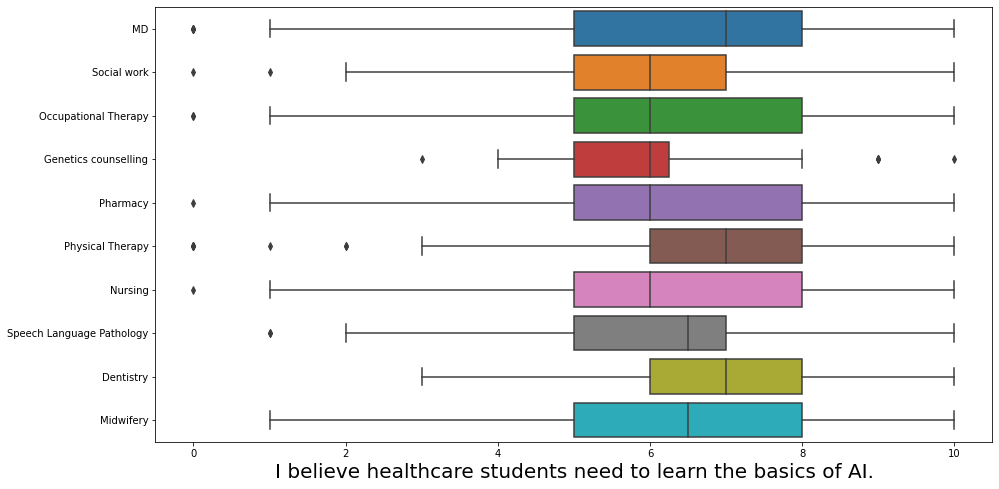

In [121]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_ed_Likert',y='Program', data=df_val)
school_plot.set_xlabel("I believe healthcare students need to learn the basics of AI.",fontsize = 20)
school_plot.set_ylabel("")
#plt.xticks(rotation=90)

plt.show()

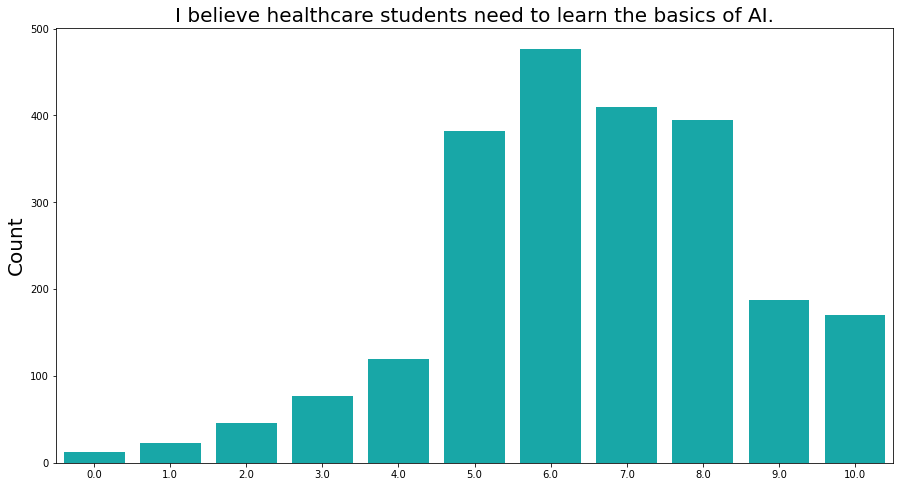

In [122]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_ed_Likert',
              data = df_val,
              color="c",)
#plt.xticks(rotation=85)
#x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#labels = ["Multiple Workshop Series","1- or 2-hour workshop",
#         "1-day course","Graduate-level training","Other",
#         "research+clinical work","research + clinical work + business"]

#plt.xticks(x1, labels, rotation=30)
#plt.xticks(rotation=30)
ax.set_title('I believe healthcare students need to learn the basics of AI.',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('',fontsize = 20)
plt.show()

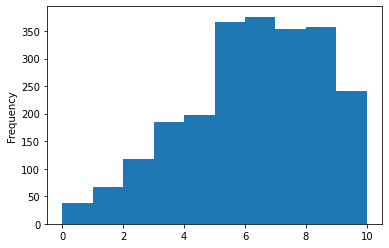

In [123]:
#Likert Scale Responses to Statement:" I understand the ethical implications of AI usage in my field."
AI_ethics_dist = df_val["AI_ethics_Likert"]
AI_ethics_dist.plot(kind="hist")

In [124]:
#counts & percentage
grp = df_val.loc[df_val['AI_ethics_Likert'] <=4]
print(len(grp))
len(grp)/len(df_val)

605


0.26304347826086955

In [125]:
scipy.stats.kruskal(*[group["AI_ethics_Likert"].values for name,group in df_val.groupby("Program")])


KruskalResult(statistic=127.70507038189372, pvalue=3.5136213378482127e-23)

In [126]:
AI_ethics_Likert_diff = sp.posthoc_conover(df_val, val_col='AI_ethics_Likert', group_col='Program')
AI_ethics_Likert_diff.to_csv("AI_ethics_Likert_diff.csv")

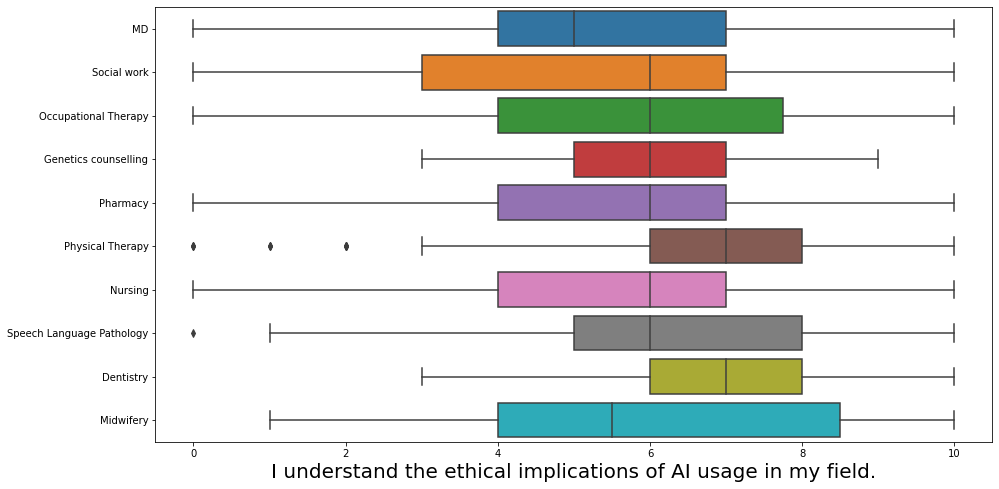

In [127]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_ethics_Likert',y='Program', data=df_val)
school_plot.set_xlabel("I understand the ethical implications of AI usage in my field.",fontsize = 20)
school_plot.set_ylabel("")
plt.show()

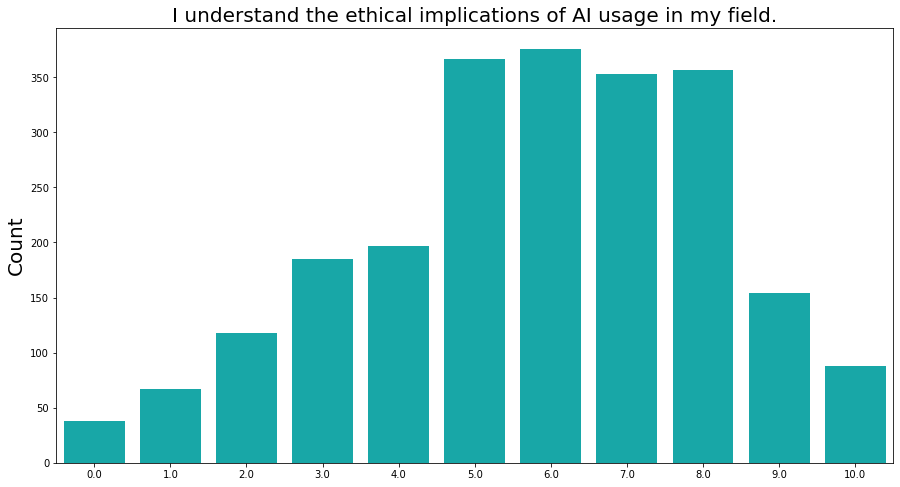

In [128]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_ethics_Likert',
              data = df_val,
              color="c",)
#plt.xticks(rotation=85)
#x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#labels = ["Multiple Workshop Series","1- or 2-hour workshop",
#         "1-day course","Graduate-level training","Other",
#         "research+clinical work","research + clinical work + business"]

#plt.xticks(x1, labels, rotation=30)
#plt.xticks(rotation=30)
ax.set_title('I understand the ethical implications of AI usage in my field.',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('',fontsize = 20)
plt.show()

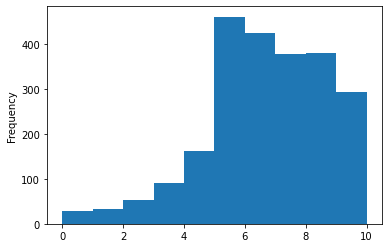

In [129]:
#Likert Scale Responses to Statement:"  I feel hopeful about having AI in my field."
AI_hope_dist = df_val["AI_hope_Likert"]
AI_hope_dist.plot(kind="hist")

In [130]:
#counts & percentage
grp = df_val.loc[df_val['AI_hope_Likert'] >=6]
print(len(grp))
len(grp)/len(df_val)

1474


0.6408695652173914

In [131]:
scipy.stats.kruskal(*[group["AI_hope_Likert"].values for name,group in df_val.groupby("Program")])


KruskalResult(statistic=98.38237498370448, pvalue=3.34086832638095e-17)

In [132]:
AI_hope_Likert = sp.posthoc_conover(df_val, val_col='AI_hope_Likert', group_col='Program')
AI_hope_Likert.to_csv("AI_hope_Likert_diff.csv")

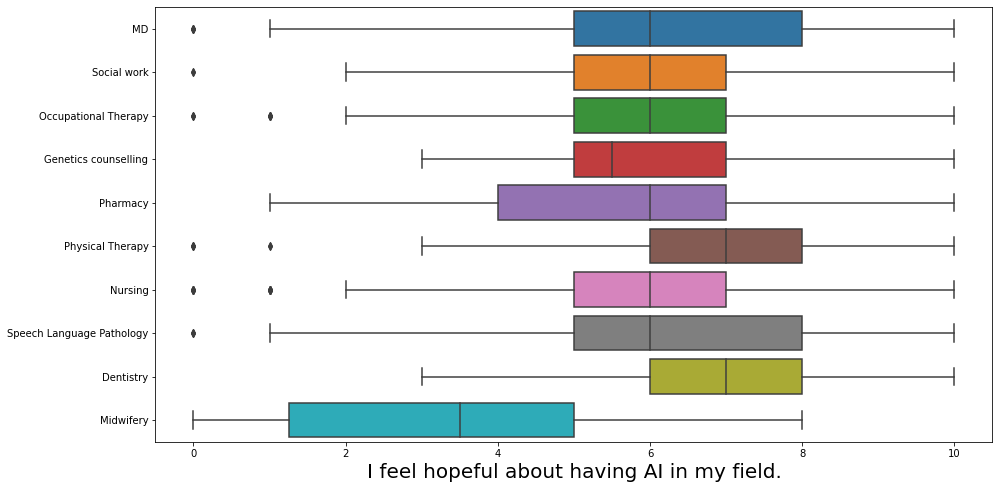

In [133]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_hope_Likert',y='Program', data=df_val)
school_plot.set_xlabel("I feel hopeful about having AI in my field.",fontsize = 20)
school_plot.set_ylabel("")
plt.show()

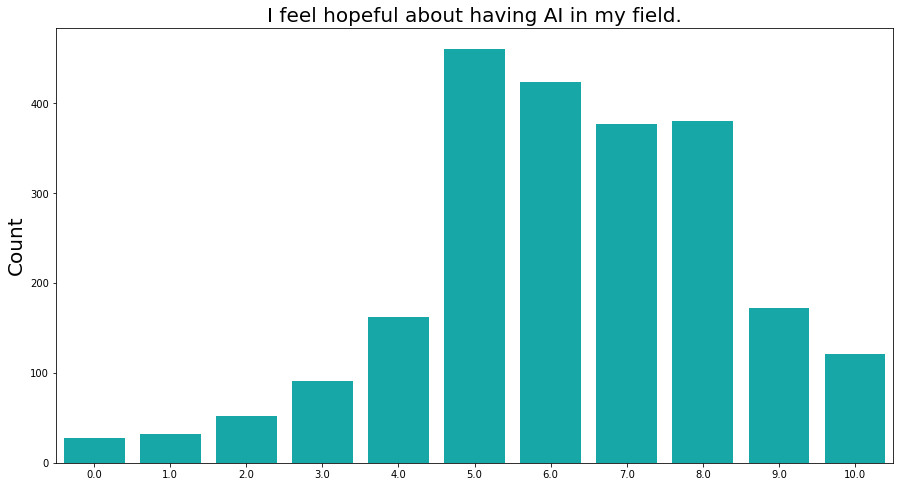

In [134]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_hope_Likert',
              data = df_val,
              color="c",)
#plt.xticks(rotation=85)
#x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#labels = ["Multiple Workshop Series","1- or 2-hour workshop",
#         "1-day course","Graduate-level training","Other",
#         "research+clinical work","research + clinical work + business"]

#plt.xticks(x1, labels, rotation=30)
#plt.xticks(rotation=30)
ax.set_title('I feel hopeful about having AI in my field.',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('',fontsize = 20)
plt.show()

In [135]:
sp.posthoc_conover(df_val, val_col='AI_hope_Likert', group_col='Program')

,Dentistry,Genetics counselling,MD,Midwifery,Nursing,Occupational Therapy,Pharmacy,Physical Therapy,Social work,Speech Language Pathology
Dentistry,1.000000e+00,0.004485,2.458508e-02,1.156116e-08,3.814297e-04,3.601743e-03,4.481663e-05,4.687454e-01,0.004386,1.622601e-01
Genetics counselling,4.485040e-03,1.000000,7.951774e-02,1.804359e-03,4.597020e-01,2.897461e-01,9.770322e-01,1.458959e-04,0.988865,4.221037e-02
MD,2.458508e-02,0.079518,1.000000e+00,2.855161e-07,4.489751e-03,1.365981e-01,5.509435e-04,7.435251e-07,0.079295,3.951752e-01
Midwifery,1.156116e-08,0.001804,2.855161e-07,1.000000e+00,1.311521e-05,5.611153e-06,2.133730e-04,3.809125e-11,0.001656,1.896061e-07
Nursing,3.814297e-04,0.459702,4.489751e-03,1.311521e-05,1.000000e+00,4.376014e-01,1.667039e-01,7.682554e-12,0.466163,8.694999e-03
Occupational Therapy,3.601743e-03,0.289746,1.365981e-01,5.611153e-06,4.376014e-01,1.000000e+00,6.345261e-02,8.406132e-08,0.292979,7.085695e-02
Pharmacy,4.481663e-05,0.977032,5.509435e-04,2.133730e-04,1.667039e-01,6.345261e-02,1.000000e+00,2.016337e-11,0.991191,9.455475e-04
Physical Therapy,4.687454e-01,0.000146,7.435251e-07,3.809125e-11,7.682554e-12,8.406132e-08,2.016337e-11,1.000000e+00,0.000133,4.596662e-03
Social work,4.385996e-03,0.988865,7.929487e-02,1.655547e-03,4.661631e-01,2.929789e-01,9.911910e-01,1.333658e-04,1.000000,4.197059e-02
Speech Language Pathology,1.622601e-01,0.042210,3.951752e-01,1.896061e-07,8.694999e-03,7.085695e-02,9.455475e-04,4.596662e-03,0.041971,1.000000e+00


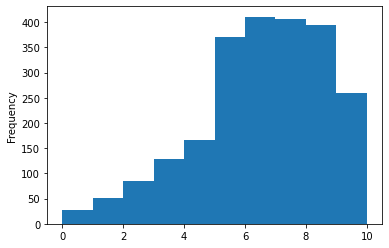

In [136]:
#Likert Scale Responses to Statement:"I am worried about the role AI will play in my field."
AI_worry_dist = df_val["AI_worry_Likert"]
AI_worry_dist.plot(kind="hist")

In [137]:
#counts & percentage
grp = df_val.loc[df_val['AI_worry_Likert'] >=6]
print(len(grp))
len(grp)/len(df_val)

1472


0.64

In [138]:
scipy.stats.kruskal(*[group["AI_worry_Likert"].values for name,group in df_val.groupby("Program")])


KruskalResult(statistic=80.97995299308577, pvalue=1.0320786565650843e-13)

In [139]:
AI_worry_Likert = sp.posthoc_conover(df_val, val_col='AI_worry_Likert', group_col='Program')
AI_worry_Likert.to_csv("AI_worry_Likert_diff.csv")

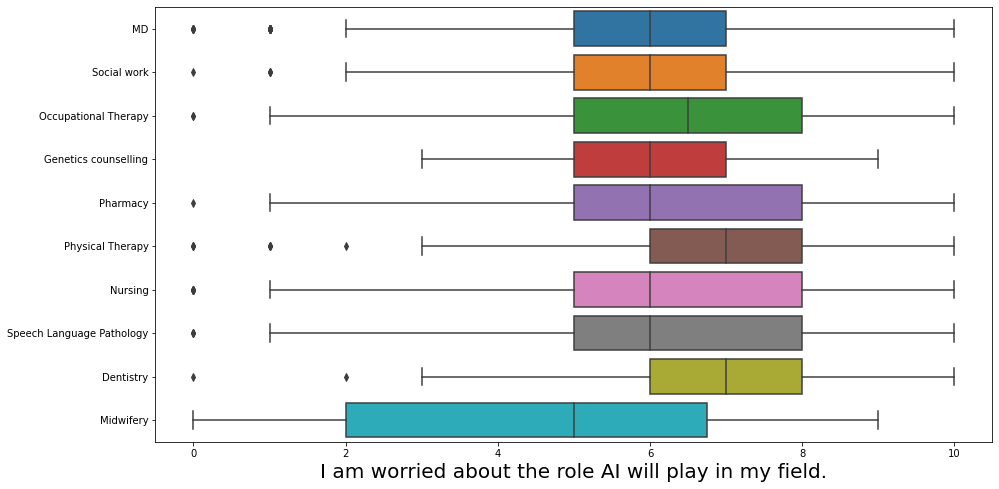

In [140]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_worry_Likert',y='Program', data=df_val)
school_plot.set_xlabel("I am worried about the role AI will play in my field.",fontsize = 20)
school_plot.set_ylabel("")
#plt.xticks(rotation=90)

plt.show()

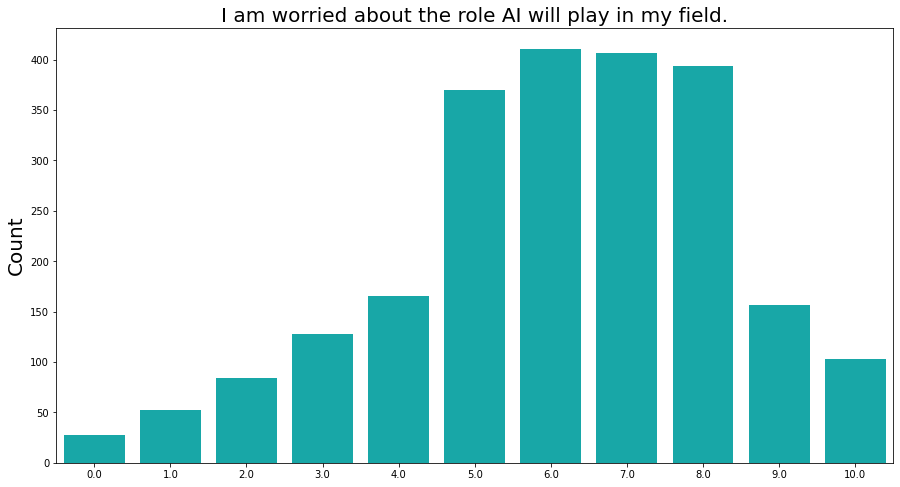

In [141]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_worry_Likert',
              data = df_val,
              color="c",)
#plt.xticks(rotation=85)
#x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#labels = ["Multiple Workshop Series","1- or 2-hour workshop",
#         "1-day course","Graduate-level training","Other",
#         "research+clinical work","research + clinical work + business"]

#plt.xticks(x1, labels, rotation=30)
#plt.xticks(rotation=30)
ax.set_title('I am worried about the role AI will play in my field.',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('',fontsize = 20)
plt.show()

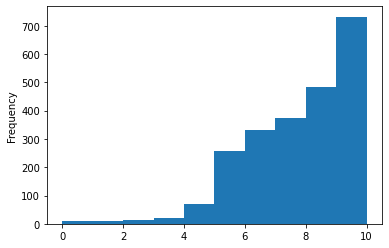

In [142]:
#Likert Scale Responses to Statement:" I believe AI is a technology that requires careful management."
AI_mgmt_dist = df_val["AI_mgmt_Likert"]
AI_mgmt_dist.plot(kind="hist")


In [143]:
#counts & percentage
grp = df_val.loc[df_val['AI_mgmt_Likert'] >=6]
print(len(grp))
len(grp)/len(df_val)

1920


0.8347826086956521

In [144]:
scipy.stats.kruskal(*[group["AI_mgmt_Likert"].values for name,group in df_val.groupby("Program")])


KruskalResult(statistic=107.67133557042874, pvalue=4.377098532038005e-19)

In [145]:
AI_mgmt_Likert = sp.posthoc_conover(df_val, val_col='AI_mgmt_Likert', group_col='Program')
AI_mgmt_Likert.to_csv("AI_mgmt_Likert.csv")

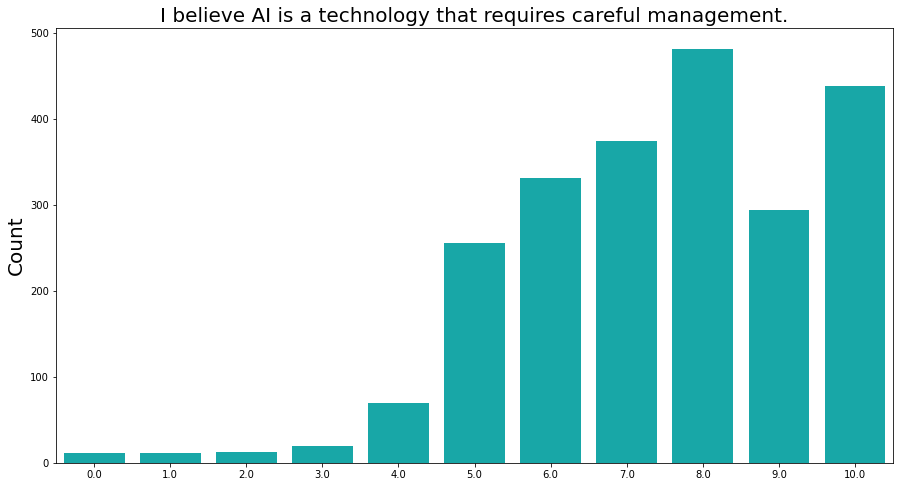

In [146]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_mgmt_Likert',
              data = df_val,
              color="c",)
#plt.xticks(rotation=85)
#x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#labels = ["Multiple Workshop Series","1- or 2-hour workshop",
#         "1-day course","Graduate-level training","Other",
#         "research+clinical work","research + clinical work + business"]

#plt.xticks(x1, labels, rotation=30)
#plt.xticks(rotation=30)
ax.set_title('I believe AI is a technology that requires careful management.',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('',fontsize = 20)
plt.show()

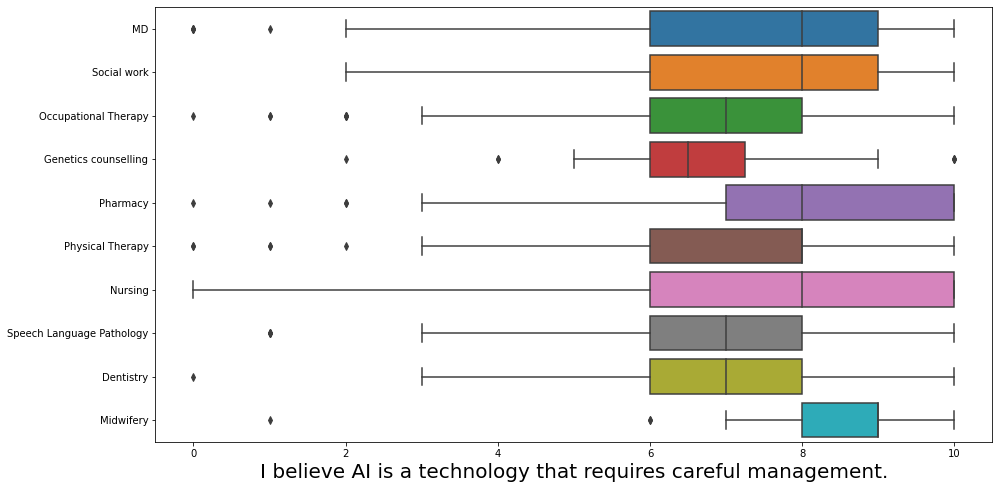

In [147]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_mgmt_Likert',y='Program', data=df_val)
school_plot.set_xlabel("I believe AI is a technology that requires careful management.",fontsize = 20)
school_plot.set_ylabel("")
#plt.xticks(rotation=90)

plt.show()

# Which objectives related to AI basics are students interested to learn about?


Obj1=identify when technology is appropriate for a given clinical context   
Obj2=understand and interpret AI-generated results  
Obj3=Be able to communicate how the technology works in a way that others can understand  
Obj4=Identify the ethical implications of using AI in clinical contexts  
Obj5=Understand how the underlying technological processes work  
Obj6=Learn the terminologies in order to communicate and collaborate with engineers/developers  
Obj8=Identify wasy AI can improve healthcare quality improvement  
Obj7=Other

In [148]:
# keeping only the ranked objectives and program col and removing the weird importID

data = df_val2[['Program', 
                'Q11_0_GROUP']].copy()
data = data.iloc[2:]

#dropping empty rows
data.dropna(subset = data.columns, inplace=True)

#splitting commas, reconcatenating
split_columns = data['Q11_0_GROUP'].str.split(',', expand=True)
split_columns
data = data.drop(columns=['Q11_0_GROUP'])
data = pd.concat([data, split_columns], axis = 1)

data

,Program,0,1,2
2,MD,8,6,5
3,MD,1,8,4
4,MD,4,2,8
5,MD,8,2,5
6,MD,1,3,5
...,...,...,...,...
2939,MD,6,1,4
2940,MD,5,6,3
2942,MD,8,3,6
2943,Pharmacy,8,4,1


In [149]:
#okay now we can numpy array this
#columns are [program, 1st rank, 2nd rank, 3rd rank]
data_array = data.to_numpy()
data_array[0]
#there is some clever dynamic way to do this by growing a hash table but lazy way
#is to hardcode it like this lol
#programs = range(1,18)
objectives = range(1,9)
programs = {'MD':1,'Nursing':2,'Occupational Therapy':3,
            'Physical Therapy':4,'Pharmacy':5,
            'Speech Language Pathology':6,'Dentistry':7,
            'Social work':8,'Genetics counselling':9,'Midwifery':10}


#we store the data in a new array, rows are objectives, columns are in groups of
#3 for each program [1st rank, 2nd rank, 3rd rank]
#with 8 objectives
#looping through to count events

counts = np.zeros((8,3*len(programs)))

for row in data_array:
  program = programs[row[0]]
  #tallying in the counts table
  #adding a score for obj1 for this program's top rank obj, program-1*n is the 
  #index of the nth ranked objective
  #python does 0 indexing so shifting index left
  obj1 = int(row[1])
  counts[(obj1-1), (program-1)*3] = counts[(obj1-1), (program-1)*3] + 1

  #in case people didn't rank
  if(row[2] is not None):
    obj2 = int(row[2]) 
    counts[(obj2-1), (program-1)*3+1] = counts[(obj1-1), (program-1)*3+1] + 1
  if(row[3] is not None):
    obj3 = int(row[3])
    counts[(obj3-1), (program-1)*3+2] = counts[(obj1-1), (program-1)*3+2] + 1

[1203.  975.  881.  932.  695.  722.   30.  840.]
['1203.0 (52.35%)', '975.0 (42.428%)', '881.0 (38.338%)', '932.0 (40.557%)', '695.0 (30.244%)', '722.0 (31.419%)', '30.0 (1.305%)', '840.0 (36.554%)']


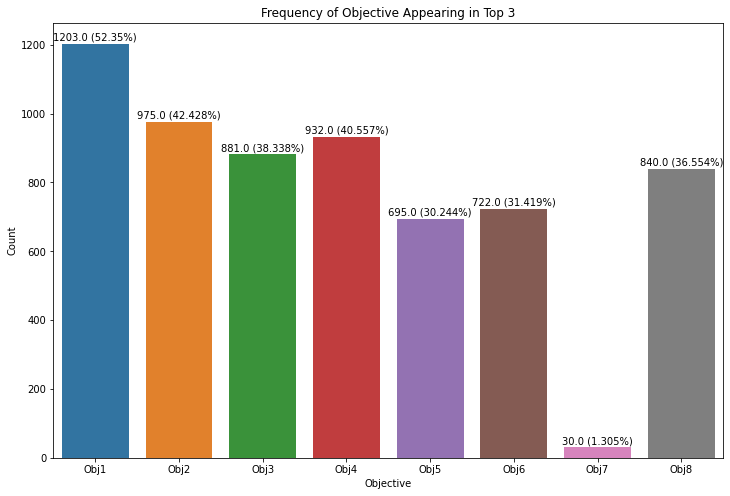

In [150]:
# nice histograms, just add up rows in the counts table lol

total_counts = np.zeros(8)
pcts = []
num_respondents, trash_garbage_unused_var = data_array.shape
for row in range(0,8):
  total_counts[row] = np.sum(counts[row,:], dtype=np.int32)
  pcts.append(str(total_counts[row]) + ' (' + str(round((np.sum(counts[row,:], dtype=np.int32) / num_respondents) * 100,3)) + "%)")

#yes I am print debugging what are you gonna do, flag my github???
print(total_counts)
print(pcts)

objs = ['Obj1', 'Obj2', 'Obj3', 'Obj4', 'Obj5', 'Obj6','Obj7','Obj8']

plt.figure(figsize=(12, 8)) 
ax = sns.barplot(x = objs, y = total_counts)
ax.set_title('Frequency of Objective Appearing in Top 3')
ax.set_ylabel('Count')
ax.set_xlabel('Objective')

#adding labels
rects = ax.patches
# Make some labels.

for rect, label in zip(rects, pcts):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.show()


# How soon will AI impact careers?

In [151]:
timeline = df_val["AI_impact_time"]
timeline.loc[:].value_counts()

in 10 years           937
in 5 years            894
in 20 years           338
in 50 years           104
not in my lifetime     27
Name: AI_impact_time, dtype: int64

In [152]:
timeline.loc[:].value_counts(normalize=True)

in 10 years           0.407391
in 5 years            0.388696
in 20 years           0.146957
in 50 years           0.045217
not in my lifetime    0.011739
Name: AI_impact_time, dtype: float64

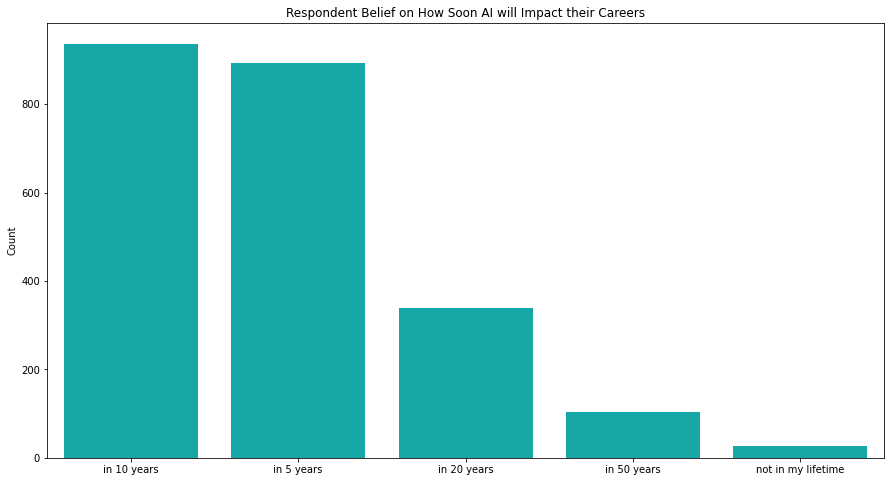

In [153]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_impact_time',
              data = df_val,
              color="c",
              order = df_val['AI_impact_time'].value_counts().index)
#plt.xticks(rotation=85)
ax.set_title('Respondent Belief on How Soon AI will Impact their Careers')
ax.set_ylabel('Count')
ax.set_xlabel('')
plt.show()

## not in my lifetime analysis


In [154]:
## subgroup analysis
niml = df_val.loc[df_val['AI_impact_time'] == "not in my lifetime"]
len(niml)

27

In [155]:
niml.Professional_interest.value_counts(normalize=True)

I want to focus on clinical work only                                                                                          0.370370
I would like to do research as part of my career in the future                                                                 0.222222
I would like to start my own practice/business in the future                                                                   0.185185
I would like to start my own practice/business in the future,I want to focus on clinical work only                             0.111111
I would like to do research as part of my career in the future,I would like to start my own practice/business in the future    0.074074
I would like to do research as part of my career in the future,I want to focus on clinical work only                           0.037037
Name: Professional_interest, dtype: float64

In [156]:
niml.age_group.value_counts()

21-25    14
26-30     6
<21       4
31-35     2
36-40     1
>50       0
46-50     0
41-45     0
Name: age_group, dtype: int64

In [157]:
niml.age_group.value_counts(normalize=True)

21-25    0.518519
26-30    0.222222
<21      0.148148
31-35    0.074074
36-40    0.037037
>50      0.000000
46-50    0.000000
41-45    0.000000
Name: age_group, dtype: float64

In [158]:
niml.Program.value_counts()

Nursing                 8
MD                      6
Physical Therapy        3
Midwifery               3
Pharmacy                2
Occupational Therapy    2
Social work             1
Dentistry               1
Genetics counselling    1
Name: Program, dtype: int64

In [159]:
niml.Program.value_counts(normalize=True)

Nursing                 0.296296
MD                      0.222222
Physical Therapy        0.111111
Midwifery               0.111111
Pharmacy                0.074074
Occupational Therapy    0.074074
Social work             0.037037
Dentistry               0.037037
Genetics counselling    0.037037
Name: Program, dtype: float64

In [160]:
niml.Gender.value_counts(normalize=True)

Female    0.555556
Male      0.407407
Other     0.037037
Name: Gender, dtype: float64

In [161]:
niml.Gender.value_counts()

Female    15
Male      11
Other      1
Name: Gender, dtype: int64

In [162]:
niml.AI_curric.value_counts()

Should be outside of curriculum time       20
Should be part of my program/curriculum     6
Not applicable                              1
Name: AI_curric, dtype: int64

In [163]:
niml.AI_percep.value_counts()

5.0     8
7.0     5
6.0     3
4.0     3
3.0     2
0.0     2
8.0     1
10.0    1
1.0     1
2.0     1
Name: AI_percep, dtype: int64

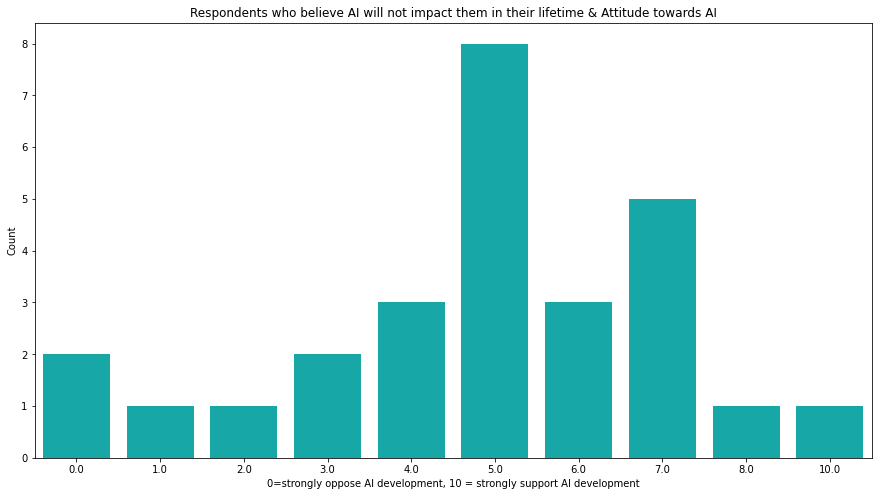

In [164]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_percep',
              data = niml,
              color="c",
              )
#plt.xticks(rotation=85)
ax.set_title('Respondents who believe AI will not impact them in their lifetime & Attitude towards AI')
ax.set_ylabel('Count')
ax.set_xlabel('0=strongly oppose AI development, 10 = strongly support AI development')
plt.show()

# Should learning AI basics be part of the curriculum or extracurricular?

In [165]:
curric = df_val["AI_curric"]
curric.loc[:].value_counts()

Should be part of my program/curriculum    1503
Should be outside of curriculum time        735
As applicable                                23
Other                                        16
Unsure                                       13
Optional                                      5
In the future                                 3
Not applicable                                2
Name: AI_curric, dtype: int64

In [166]:
curric.loc[:].value_counts(normalize=True)

Should be part of my program/curriculum    0.653478
Should be outside of curriculum time       0.319565
As applicable                              0.010000
Other                                      0.006957
Unsure                                     0.005652
Optional                                   0.002174
In the future                              0.001304
Not applicable                             0.000870
Name: AI_curric, dtype: float64

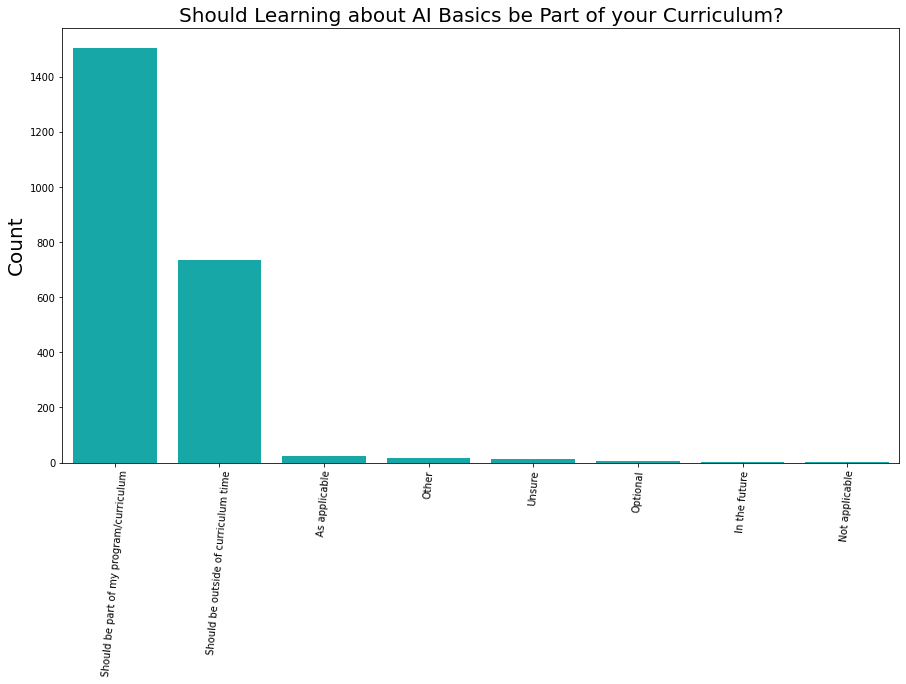

In [167]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_curric',
              data = df_val,
              color="c",
              order = df_val['AI_curric'].value_counts().index)
plt.xticks(rotation=85)
ax.set_title('Should Learning about AI Basics be Part of your Curriculum?',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('',fontsize = 20)
plt.show()


In [168]:
support = df_val.loc[df_val['AI_percep'] >=6]
print(len(support))
print(len(support)/len(df_val))
print(len(support.loc[support['AI_curric'] == "Should be outside of curriculum time"]))
print(len(support.loc[support['AI_curric'] == "Should be part of my program/curriculum"]))


1706
0.7417391304347826
484
1181


In [169]:
print(len(df_val.loc[df_val['AI_curric'] == "Should be part of my program/curriculum"]))
print(len(df_val.loc[df_val['AI_curric'] == "Should be part of my program/curriculum"])/len(df_val))


print(len(df_val.loc[df_val['AI_curric'] == "Should be outside of curriculum time"]))
print(len(df_val.loc[df_val['AI_curric'] == "Should be outside of curriculum time"])/len(df_val))


print(len(df_val.loc[df_val['AI_curric'] == "Other"]))
print(len(df_val.loc[df_val['AI_curric'] == "Other"])/len(df_val))


1503
0.6534782608695652
735
0.31956521739130433
16
0.006956521739130435


# How should AI basics be delivered to students (if any)?

In [170]:
AI_ed_form = df_val["AI_ed_form"]
AI_ed_form.loc[:].value_counts()

Multiple workshop series                                                                                      691
1- or 2-hour workshop                                                                                         547
1-day course                                                                                                  397
Graduate-level education (Master's, PhD)                                                                      162
1-day course,Multiple workshop series,1- or 2-hour workshop                                                   112
1-day course,1- or 2-hour workshop                                                                             98
Multiple workshop series,1- or 2-hour workshop                                                                 97
1-day course,Multiple workshop series                                                                          45
Multiple workshop series,Graduate-level education (Master's, PhD)                       

In [171]:
AI_ed_form.loc[:].value_counts(normalize=True)

Multiple workshop series                                                                                      0.300435
1- or 2-hour workshop                                                                                         0.237826
1-day course                                                                                                  0.172609
Graduate-level education (Master's, PhD)                                                                      0.070435
1-day course,Multiple workshop series,1- or 2-hour workshop                                                   0.048696
1-day course,1- or 2-hour workshop                                                                            0.042609
Multiple workshop series,1- or 2-hour workshop                                                                0.042174
1-day course,Multiple workshop series                                                                         0.019565
Multiple workshop series,Graduate-level educatio

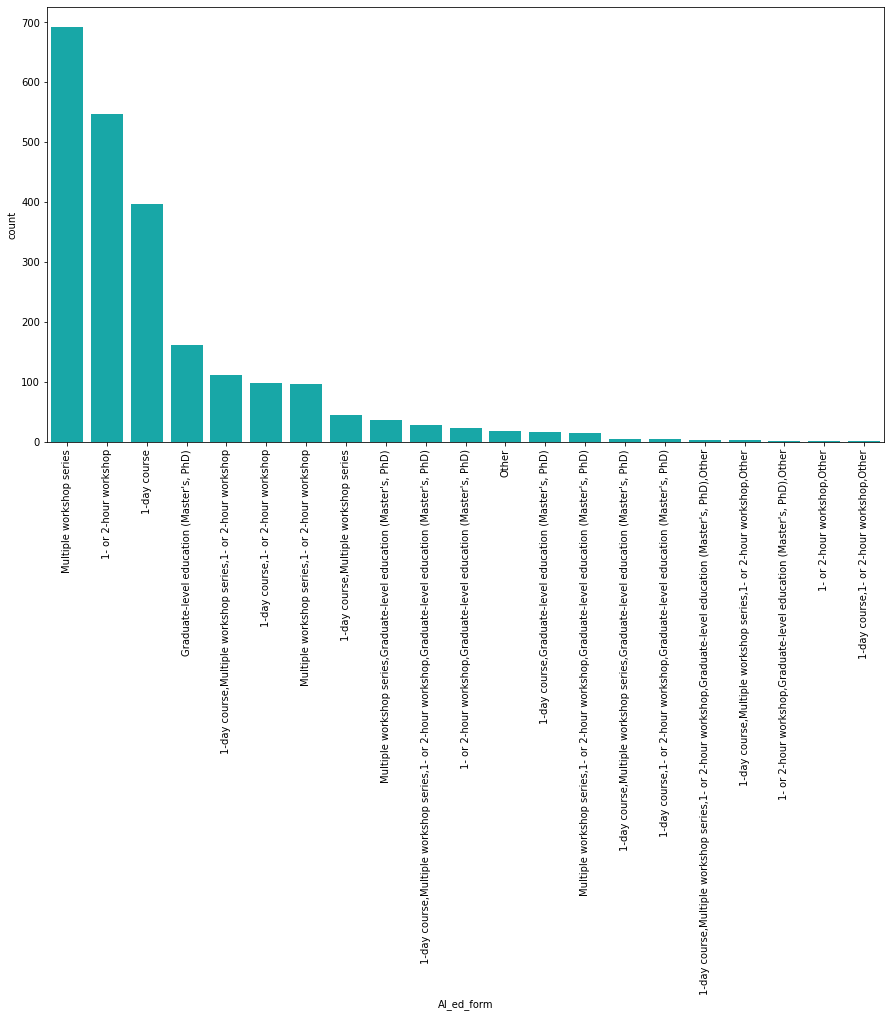

In [172]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'AI_ed_form',
              data = df_val,
              color="c",
              order = df_val['AI_ed_form'].value_counts().index)
ax.set_title('Which of the following would you be interested in attending to learn more about AI basics?',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('',fontsize = 20)
plt.xticks(rotation=90)

plt.show()